<a href="https://colab.research.google.com/github/mvs110/GIS-FALL/blob/main/Copy_of_PS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

# PS 1

TITLE : EMPIRICAL ANALYSIS OF HEALTH AND ECONOMIC DISPARITIES ACROSS NEW JERSEY COUNTIES

**Abstract**


The distribution of health outcomes across communities reflects the interplay of socioeconomic factors such as income inequality, education, access to healthcare, and environmental quality. Among these, poverty emerges as a critical determinant, often shaping physical and mental health outcomes. This research investigates health disparities in New Jersey by examining the prevalence of physically and mentally unhealthy days across counties, mapped against socioeconomic indicators. Understanding these patterns is crucial for targeted public health interventions and policies aimed at reducing disparities.



Introduction

Health disparities in the United States are deeply intertwined with socioeconomic inequities. Poverty, in particular, exacerbates health challenges by limiting access to quality healthcare, nutritious food, and safe living environments. According to the U.S. Department of Health and Human Services, socioeconomic status is a key determinant of health, influencing outcomes ranging from chronic disease prevalence to life expectancy.


Health outcomes across communities are influenced by a complex interplay of socioeconomic factors, with poverty often cited as a critical determinant. In New Jersey, like much of the United States, geographic and economic disparities manifest in various aspects of public health, including the prevalence of physically and mentally unhealthy days reported by residents.


Also in  New Jersey, disparities in income, education, and access to healthcare mirror broader national trends. For example, counties with higher poverty rates often report increased instances of physically and mentally unhealthy days, as evidenced by self-reported data from sources such as the Behavioral Risk Factor Surveillance System (BRFSS). This study aims to investigate these health disparities by mapping and analyzing the distribution of unhealthy days across New Jersey counties, integrating socioeconomic data to deepen our understanding of these patterns.





**Literature Review**



**Poverty and Health Outcomes**

Studies have consistently highlighted the link between poverty and adverse health outcomes. The World Health Organization (WHO) identifies poverty as a major barrier to achieving equitable health outcomes, stating that it limits access to essential resources such as healthcare and education. Research by Braveman et al. (2011) underscores how economic deprivation contributes to chronic diseases and mental health issues, perpetuating cycles of ill health.



**Socioeconomic Determinants of Mental Health**


The mental health of individuals in low-income communities is disproportionately affected by stressors such as financial insecurity, unsafe neighborhoods, and limited access to mental health services (Patel et al., 2018). A study by Marmot et al. (2008) links socioeconomic deprivation to increased rates of depression and anxiety, emphasizing the need for systemic interventions.



**Geographic Health Disparities in New Jersey**


Research specific to New Jersey reveals that counties such as Essex and Camden, characterized by higher poverty rates, also report a greater prevalence of unhealthy days (NJSHAD, 2020). Conversely, wealthier counties such as Hunterdon and Somerset report fewer unhealthy days, underscoring the geographic dimension of health disparities.



**Health Mapping and Socioeconomic Analysis**


Spatial analysis has become a critical tool in public health research. Studies by Cummins et al. (2007) highlight the importance of integrating geographic information systems (GIS) with socioeconomic data to visualize health inequities. Applying this methodology to New Jersey provides insights into how poverty shapes health outcomes at the county level.



**Methodology**


The study uses data from the BRFSS to measure the prevalence of physically and mentally unhealthy days among residents of New Jersey. Socioeconomic data, including poverty rates, education levels, and healthcare access, are obtained from the U.S. Census Bureau and New Jersey State Health Assessment Data (NJSHAD). Histogram, scatterplots, Spatial mapping, etc are employed to examine correlations and identify hotspots of health disparities.

To execute this:

New jersey county level shapefile, quality of life data for new jersey counties, and New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022 were used.

**Hypothesis:**


 Counties in New Jersey with higher poverty rates will report more physically and mentally unhealthy days per month, reflecting the adverse impacts of socioeconomic status on health during the COVID-19 pandemic.


** Research Question:**

 What spatial patterns exist in the distribution of physically and mentally unhealthy days across New Jersey counties, and how are these patterns associated with county-level poverty rates in 2020?





**Data on:**

New Jersey Quality of Life - Physically Unhealthy Days Per Month / Mentally Unhealthy Days Per Month .

New Jersey Average Percentage of all People that are Living in Poverty as of 2018-2022.


**Data source:**

--Social Explorer: Health Data 2020 Release, Census


**Unit of analysis for datasets:** County level.


In [ ]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

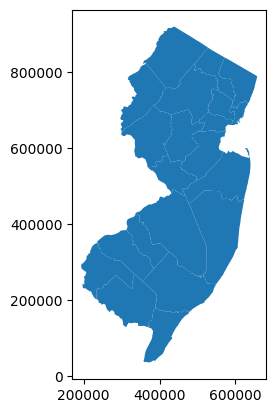

In [ ]:
#make the map
njC0.plot()

In [ ]:
njC0.head()

COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0    ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1      BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2  BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3      CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4    CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   

  FIPSCO          ACRES    SQ_MILES  POP2010  ...  POP1990  POP1980  \
0      1  390815.404215  610.649069   274549  ...   275372   204615   
1      3  153490.275182  239.828555   905116  ...   829592   849843   
2      5  525002.683590  820.316693   448734  ...   395066   362542   
3      7  145650.507808  227.578918   513657  ...   532498   471650   
4      9  183126.574240  286.135272    97265  ...    95089    82266   

   POPDEN2010  POPDEN2000  POPDEN1990  POPDEN1980        REGION  \
0         450         414         451         335       COASTAL   
1        3774        3686        3459        3544  NORTHEASTERN   
2         547         516         482         442      SOUTHERN   
3        2257        2236        2340        2073      SOUTHERN   
4         340         358         332         288       COASTAL   

      Shape_Leng    Shape_Area  \
0  650228.153906  1.702385e+10   
1  443326.122021  6.686010e+09   
2  788906.717476  2.286903e+10   
3  495010.034901  6.344511e+09   
4  514564.858771  7.976962e+09   

                                            geometry  
0  POLYGON ((443056.01 311529.77, 443068.44 31152...  
1  POLYGON ((656200.963 783614.366, 656141.127 78...  
2  POLYGON ((436626.69 491361.78, 436701.19 49135...  
3  POLYGON ((342763.99 423475.83, 342804.1 423429...  
4  POLYGON ((390389.73 177065.13, 390410.17 17705...  

[5 rows x 21 columns]

In [ ]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [ ]:
NJ_pov.dtypes

GEOID_DESCRIPTION     object
COUNTY                object
GEOID_NAME            object
SITSINSTATE           object
GEOID                  int32
GEOID_FORMATTED        int32
PPOV                 float32
TIMEFRAME             object
GEOVINTAGE             int16
SOURCE                object
LOCATION              object
dtype: object

In [ ]:
qua_lf.dtypes


COUNTY                           object
PhysicallyUnhealthyDaysperMo    float64
MentallyUnhealthyDaysperMont    float64
dtype: object

In [ ]:
NJ_pov.head(2)

GEOID_DESCRIPTION    COUNTY GEOID_NAME SITSINSTATE  GEOID  GEOID_FORMATTED  \
0            County  ATLANTIC   Atlantic          NJ  34001            34001   
1            County    BERGEN     Bergen          NJ  34003            34003   

    PPOV  TIMEFRAME  GEOVINTAGE  SOURCE            LOCATION  
0  13.03  2018-2022        2022  Census  New Jersey (State)  
1   6.77  2018-2022        2022  Census  New Jersey (State)

In [ ]:
qua_lf.head(2)

COUNTY  PhysicallyUnhealthyDaysperMo  MentallyUnhealthyDaysperMont
0  ATLANTIC                          4.41                          4.42
1    BERGEN                          3.14                          3.42

In [ ]:
nj_qualf = pd.merge(njC0, qua_lf, on='COUNTY',how='outer',indicator=True)

In [ ]:
nj_pov = pd.merge(njC0, NJ_pov, on='COUNTY', how='outer', indicator='merge_status')


In [ ]:
nj_qualf.head(24)

COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0     ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1       BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2   BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3       CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4     CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   
5   CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275    34011   
6        ESSEX       Essex County  ESS       County of Essex  882276    34013   
7   GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277    34015   
8       HUDSON      Hudson County  HUD      County of Hudson  882278    34017   
9    HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228    34019   
10      MERCER      Mercer County  MER      County of Mercer  882229    34021   
11   MIDDLESEX   Middlesex County  MID   County of Middlesex  882230    34023   
12    MONMOUTH    Monmouth County  MON    County of Monmouth  882910    34025   
13      MORRIS      Morris County  MOR      County of Morris  882231    34027   
14       OCEAN       Ocean County  OCE       County of Ocean  882279    34029   
15     PASSAIC     Passaic County  PAS     County of Passaic  882232    34031   
16       SALEM       Salem County  SAL       County of Salem  882233    34033   
17    SOMERSET    Somerset County  SOM    County of Somerset  882234    34035   
18      SUSSEX      Sussex County  SUS      County of Sussex  882236    34037   
19       UNION       Union County  UNI       County of Union  882235    34039   
20      WARREN      Warren County  WAR      County of Warren  882237    34041   

   FIPSCO          ACRES    SQ_MILES  POP2010  ...  POPDEN2000  POPDEN1990  \
0       1  390815.404215  610.649069   274549  ...         414         451   
1       3  153490.275182  239.828555   905116  ...        3686        3459   
2       5  525002.683590  820.316693   448734  ...         516         482   
3       7  145650.507808  227.578918   513657  ...        2236        2340   
4       9  183126.574240  286.135272    97265  ...         358         332   
5      11  321150.321572  501.797378   156898  ...         292         275   
6      13   83034.859489  129.741968   783969  ...        6118        5768   
7      15  215166.893094  336.198271   288288  ...         758         684   
8      17   32982.400794   51.535001   634266  ...       11817       10733   
9      19  279885.206384  437.320635   128349  ...         279         246   
10     21  146431.864374  228.799788   366513  ...        1533        1424   
11     23  202859.561527  316.968065   809858  ...        2367        2119   
12     25  310834.264884  485.678539   630380  ...        1267        1314   
13     27  308084.429543  481.381921   492276  ...         977         875   
14     29  485078.440831  757.935064   576567  ...         674         585   
15     31  126926.846048  198.323197   501226  ...        2466        2284   
16     33  222158.656047  347.122900    66083  ...         185         188   
17     35  195127.363184  304.886505   323444  ...         976         788   
18     37  342730.853674  535.516959   149265  ...         269         260   
19     39   67438.592595  105.372801   536499  ...        4959        4686   
20     41  232061.359022  362.595874   108692  ...         283         253   

    POPDEN1980        REGION     Shape_Leng    Shape_Area  \
0          335       COASTAL  650228.153906  1.702385e+10   
1         3544  NORTHEASTERN  443326.122021  6.686010e+09   
2          442      SOUTHERN  788906.717476  2.286903e+10   
3         2073      SOUTHERN  495010.034901  6.344511e+09   
4          288       COASTAL  514564.858771  7.976962e+09   
5          265      SOUTHERN  704221.618565  1.398925e+10   
6         6556  NORTHEASTERN  344556.557700  3.616984e+09   
7          595      

Cutting data set code

In [ ]:
#camden_county = nj_qualf[nj_qualf['COUNTY'].str.lower() == 'CAMDEN']

In [ ]:
nj_pov.head(24)

COUNTY         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0     ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1       BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2   BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   
3       CAMDEN      Camden County  CAM      County of Camden  882273    34007   
4     CAPE MAY    Cape May County  CAP    County of Cape May  882274    34009   
5   CUMBERLAND  Cumberland County  CUM  County of Cumberland  882275    34011   
6        ESSEX       Essex County  ESS       County of Essex  882276    34013   
7   GLOUCESTER  Gloucester County  GLO  County of Gloucester  882277    34015   
8       HUDSON      Hudson County  HUD      County of Hudson  882278    34017   
9    HUNTERDON   Hunterdon County  HUN   County of Hunterdon  882228    34019   
10      MERCER      Mercer County  MER      County of Mercer  882229    34021   
11   MIDDLESEX   Middlesex County  MID   County of Middlesex  882230    34023   
12    MONMOUTH    Monmouth County  MON    County of Monmouth  882910    34025   
13      MORRIS      Morris County  MOR      County of Morris  882231    34027   
14       OCEAN       Ocean County  OCE       County of Ocean  882279    34029   
15     PASSAIC     Passaic County  PAS     County of Passaic  882232    34031   
16       SALEM       Salem County  SAL       County of Salem  882233    34033   
17    SOMERSET    Somerset County  SOM    County of Somerset  882234    34035   
18      SUSSEX      Sussex County  SUS      County of Sussex  882236    34037   
19       UNION       Union County  UNI       County of Union  882235    34039   
20      WARREN      Warren County  WAR      County of Warren  882237    34041   

   FIPSCO          ACRES    SQ_MILES  POP2010  ...  GEOID_NAME  SITSINSTATE  \
0       1  390815.404215  610.649069   274549  ...    Atlantic           NJ   
1       3  153490.275182  239.828555   905116  ...      Bergen           NJ   
2       5  525002.683590  820.316693   448734  ...  Burlington           NJ   
3       7  145650.507808  227.578918   513657  ...      Camden           NJ   
4       9  183126.574240  286.135272    97265  ...    Cape May           NJ   
5      11  321150.321572  501.797378   156898  ...  Cumberland           NJ   
6      13   83034.859489  129.741968   783969  ...       Essex           NJ   
7      15  215166.893094  336.198271   288288  ...  Gloucester           NJ   
8      17   32982.400794   51.535001   634266  ...      Hudson           NJ   
9      19  279885.206384  437.320635   128349  ...   Hunterdon           NJ   
10     21  146431.864374  228.799788   366513  ...      Mercer           NJ   
11     23  202859.561527  316.968065   809858  ...   Middlesex           NJ   
12     25  310834.264884  485.678539   630380  ...    Monmouth           NJ   
13     27  308084.429543  481.381921   492276  ...      Morris           NJ   
14     29  485078.440831  757.935064   576567  ...       Ocean           NJ   
15     31  126926.846048  198.323197   501226  ...     Passaic           NJ   
16     33  222158.656047  347.122900    66083  ...       Salem           NJ   
17     35  195127.363184  304.886505   323444  ...    Somerset           NJ   
18     37  342730.853674  535.516959   149265  ...      Sussex           NJ   
19     39   67438.592595  105.372801   536499  ...       Union           NJ   
20     41  232061.359022  362.595874   108692  ...      Warren           NJ   

    GEOID  GEOID_FORMATTED   PPOV  TIMEFRAME  GEOVINTAGE  SOURCE  \
0   34001            34001  13.03  2018-2022        2022  Census   
1   34003            34003   6.77  2018-2022        2022  Census   
2   34005            34005   6.58  2018-2022        2022  Census   
3   34007            34007  12.41  2018-2022        2022  Census   
4   34009            34009   8.96  2018-2022        2022  Census   
5   34011            34011  15.52  2018-2022        2022  Census   
6   34013 

In [ ]:
nj_qualf1 = pd.merge(njC0, qua_lf, on='COUNTY',how='inner',indicator=False)

In [ ]:
nj_pov1 = pd.merge(njC0, NJ_pov, on='COUNTY',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 95.84471590140998, 'source/definition: Social Explorer - Health Data 2020 Release')

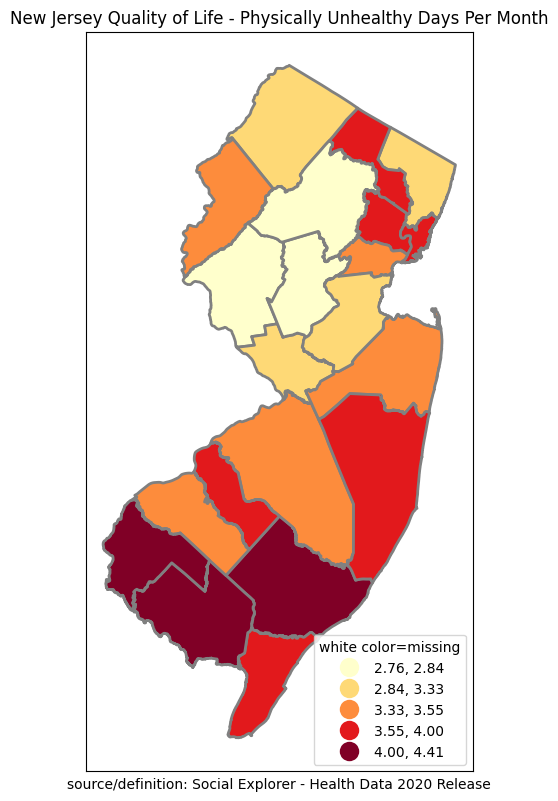

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,10))
nj_qualf1.plot(ax=ax,column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

New Jersey Counties showing Physically unhealthy days per month.

<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Social Explorer - Health Data 2020 Release')

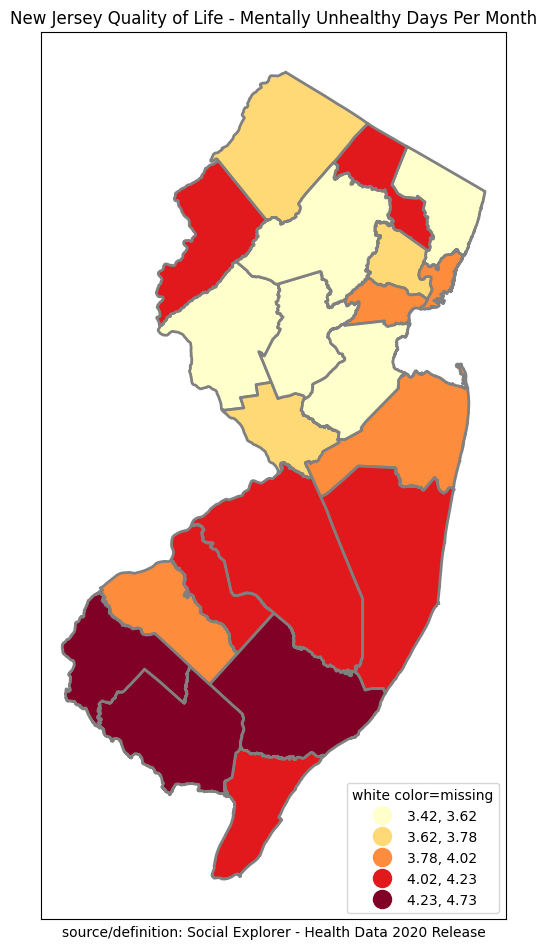

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,12))
nj_qualf1.plot(ax=ax,column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Social Explorer - Health Data 2020 Release''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

Output: New Jersey counties showing mentally unstable days per month.

To ascertain more trends : E.g Poverty (New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022)

To get a more defined map, county names were included.

In [ ]:
print(nj_pov.columns)


Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'GEOID_DESCRIPTION',
       'GEOID_NAME', 'SITSINSTATE', 'GEOID', 'GEOID_FORMATTED', 'PPOV',
       'TIMEFRAME', 'GEOVINTAGE', 'SOURCE', 'LOCATION', 'merge_status'],
      dtype='object')


In [ ]:
nj_pov = nj_pov.set_geometry('geometry')



<Axes: >

[]

[]

Text(0.5, 120.86921463724754, 'source/definition: Census')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

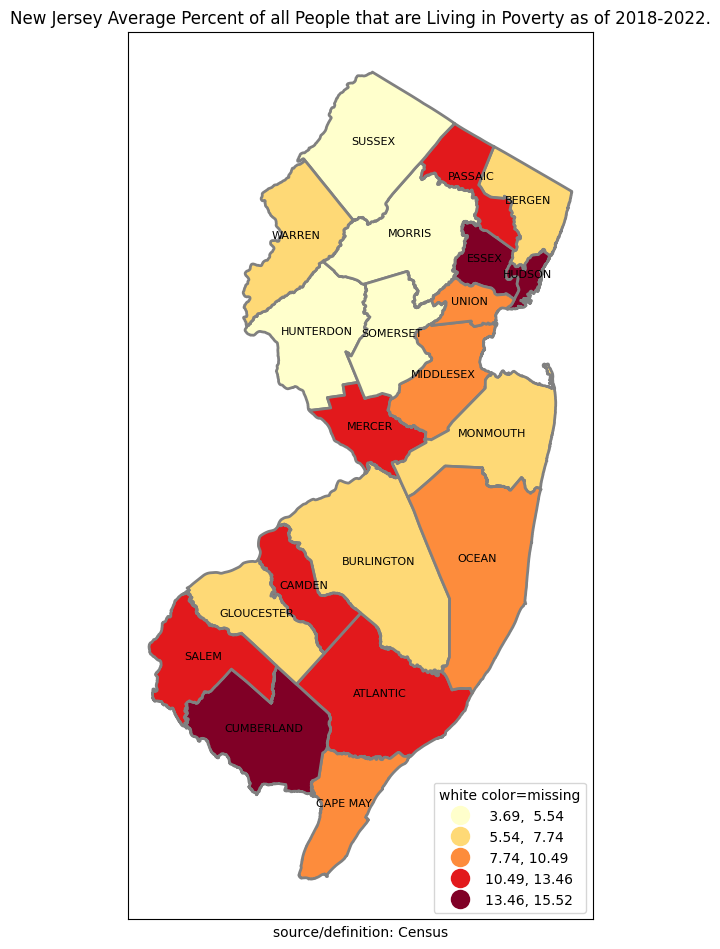

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 12))
nj_pov.plot(ax=ax, column='PPOV', legend=True, cmap='YlOrRd',
            scheme='natural_breaks', k=5, edgecolor='grey', linewidth=2,
            legend_kwds={"fmt": "{:,.2f}", 'loc': 'lower right', 'markerscale': 1.4})
leg1 = ax.get_legend()
leg1.set_title('white color=missing')
ax.title.set_text("New Jersey Average Percent of all People that are Living in Poverty as of 2018-2022.")
ax.set_xticks([])  # removes x ticks
ax.set_yticks([])  # removes y ticks
ax.set_xlabel('source/definition: Census')

for _, row in nj_pov.iterrows():
    # Calculate the centroid of the geometry for placing labels
    centroid = row['geometry'].centroid
    # Annotate the county name at the centroid
    ax.annotate(row['COUNTY'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', fontsize=8)


Output: Counties names to better understand trends.






**Findings:**

The mapped data revealed a notably higher concentration of both physically and mentally unhealthy days in South Jersey compared to other regions of the state. This phenomenon prompts a closer examination of the underlying factors that might contribute to these health disparities.


**Socioeconomic Factors:**


South Jersey has historically faced various economic challenges compared to its northern counterpart. Factors such as higher rates of unemployment, lower income levels, and limited access to healthcare services can contribute to worse health outcomes. These socioeconomic disparities could explain the higher number of unhealthy

**Demographic Considerations: **



Differences in population density, age distribution, and racial and ethnic makeup can also influence health metrics. For instance, areas with older populations or higher proportions of minority groups who have faced systemic healthcare barriers might report more unhealthy days. To corroborate with this findings, Thompson et al. (2021) in their research in the Journal of Public Health observed similar patterns where regions with lower socioeconomic indices suffered disproportionately during health crises, validating the socioeconomic interpretations made here.




Reference

Braveman, P., & Gottlieb, L. (2014). The social determinants of health: it's time to consider the causes of the causes. Public health reports, 129(1_suppl2), 19-31.

Cummins, S., Curtis, S., Diez-Roux, A. V., & Macintyre, S. (2007). Understanding and representing ‘place’in health research: a relational approach. Social science & medicine, 65(9), 1825-1838.

Marmot, M., Friel, S., Bell, R., Houweling, T. A., & Taylor, S. (2008). Closing the gap in a generation: health equity through action on the social determinants of health. The lancet, 372(9650), 1661-1669.

New Jersey Department of Health. (n.d.). New Jersey State Health Assessment Data (NJSHAD): Community health status indicators. Retrieved from https://www-doh.nj.gov/doh-shad/

Patel, V., Saxena, S., Lund, C., Thornicroft, G., Baingana, F., Bolton, P., ... & Unützer, J. (2018). The Lancet Commission on global mental health and sustainable development. The lancet, 392(10157), 1553-1598.


Centers for Disease Control and Prevention. (n.d.). Behavioral Risk Factor Surveillance System (BRFSS) prevalence and trends data. Retrieved from https://www.cdc.gov/brfss/brfssprevalence/index.html

New Jersey Department of Health. (n.d.). New Jersey State Health Assessment Data (NJSHAD). Retrieved from https://www-doh.nj.gov/doh-shad/
  











**PS2**



In [ ]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

In [ ]:
qua_lf = pd.read_stata('https://github.com/mvs110/GIS-FALL/blob/main/Quality%20of%20life.dta?raw=true')
NJ_pov = pd.read_stata('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NJ%20counties%20poverty%20data.dta')

 Load the CSV file

In [ ]:
np_location = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/NPlocation.csv')

In [ ]:
np_location.head(15)

EIN                                  Organization Name  \
0          ein                                  organization_name   
1   01-0554061        Mount Ephraim Senior Housing Initiative Inc   
2   01-0801820         Camden County Partnership for Children Inc   
3   02-0650756  Urban Promise Ministries Community Development...   
4   02-0660903         Allied Resources for Children Incorporated   
5   04-3769403                        Stacy Zallie Foundation Inc   
6   06-1024058          American Society of Perianesthesia Nurses   
7   11-3786401                                   Village Wrap Inc   
8   13-2640040                                          Asgpp Inc   
9   13-4205636                      Family Health Initiatives Inc   
10  13-6096832                       Alice Rich Northrop Memorial   
11  14-1859173                                   Arvf Corporation   
12  14-1918450         Tower of Hope International Ministries Inc   
13  20-0090179                           Runnemede Industries Inc   
14  20-0468802  Nehemiah Project Community Development Corpora...   

                          Address             City       State       Zip  \
0                         address             city  state_code  zip_code   
1                  587 Haddon Ave     COLLINGSWOOD          NJ      8108   
2           221 Laurel Rd Ste 300         VOORHEES          NJ      8043   
3              2 N FORKLANDING RD      MAPLE SHADE          NJ      8052   
4                879 BEIDEMAN AVE           CAMDEN          NJ      8105   
5     1230 Blackwood Clementon Rd        CLEMENTON          NJ      8021   
6                  90 Frontage Rd      CHERRY HILL          NJ      8034   
7                  316 Haddon Ave     COLLINGSWOOD          NJ      8108   
8                     PO Box 1654    MERCHANTVILLE          NJ      8109   
9      2500 McClellan Ave Ste 250       PENNSAUKEN          NJ      8109   
10  100 Lindis Farne Ave Apt 1308  HADDON TOWNSHIP          NJ      8108   
11         2115 Voorhees Town Ctr         VOORHEES          NJ      8043   
12                     PO Box 148       PENNSAUKEN          NJ      8110   
13                 1940 Olney Ave      CHERRY HILL          NJ      8003   
14                    PO Box 2031           CAMDEN          NJ      8101   

   Total Revenue - Current Year Total Functional Expenses  \
0                       tot_rev                   tot_exp   
1                        635333                    786832   
2                      17210381                  13841547   
3                        706354                    617543   
4                        329853                    136385   
5                         90903                     51100   
6                       3496191                   2481404   
7                        285182                    250496   
8                        106178                     87609   
9                       3659074                   3733670   
10                        55464                     26443   
11                       324900                    327759   
12                        46115                     40750   
13                       926469                    896278   
14                         3528                         0   

   Total Liabilities: End of Year Total Assets: End of Year  \
0                        tot_liab                tot_assets   
1                         7006834                   4208983   
2                          922543                   8510476   
3                            8623                    262795   
4                           23054                    284844   
5                               0                    161162   
6                          775318                   7337515   
7                               0                     36374   
8                               0                    154196   
9                         1113091                   1556413   
10                 

In [ ]:
np_location.dtypes

EIN                                                       object
Organization Name                                         object
Address                                                   object
City                                                      object
State                                                     object
Zip                                                       object
Total Revenue - Current Year                              object
Total Functional Expenses                                 object
Total Liabilities: End of Year                            object
Total Assets: End of Year                                 object
Number of Employees Reported on Form W-3                  object
Net Assets                                                object
National Taxonomy of Exempt Entities Short Description    object
Type of 990 Form Filed                                    object
Fiscal Year End                                           object
National Taxonomy of Exempt Entities Full Description     object
Point Source                                              object
Selected Location                                         object
dtype: object

In [ ]:
print(np_location.columns)

Index(['EIN', 'Organization Name', 'Address', 'City', 'State', 'Zip',
       'Total Revenue - Current Year', 'Total Functional Expenses',
       'Total Liabilities: End of Year', 'Total Assets: End of Year',
       'Number of Employees Reported on Form W-3', 'Net Assets',
       'National Taxonomy of Exempt Entities Short Description',
       'Type of 990 Form Filed', 'Fiscal Year End',
       'National Taxonomy of Exempt Entities Full Description', 'Point Source',
       'Selected Location'],
      dtype='object')


#PS2


**METHODOLOGY **


unemployment rate and quality of life across New Jersey. The pandemic has exacerbated economic and health inequities, leaving many counties yet to recover fully. Analyzing the lingering effects of pandemic-era unemployment provides critical insights into its impact on physical and mental health outcomes.


This study further explored one of the key socio-economic factors that was highlighted, which is the unemployment rate in New Jersey. This study examined the relationship between the unemployment rate and quality of life in New Jersey with a closer look at mentally unhealthy days per month and physically unhealthy days per month. It is worth noting that even after the pandemic, many counties in New Jersey are yet to recover from the pandemic era. A special focus is placed on the relationship between unemployment and quality of life, particularly in counties hardest hit by the pandemic.





**Literature Review**

Research specific to New Jersey reveals that counties such as Essex and Camden, characterized by higher poverty and unemployment rates, also report a greater prevalence of unhealthy days (NJSHAD, 2020). Conversely, wealthier counties such as Hunterdon and Somerset report fewer unhealthy days, underscoring the geographic dimension of health disparities.


Studies have consistently highlighted the link between poverty and adverse health outcomes. The World Health Organization (WHO) identifies poverty as a major barrier to achieving equitable health outcomes, stating that it limits access to essential resources such as healthcare and education. Research by Braveman et al. (2011) underscores how economic deprivation contributes to chronic diseases and mental health issues, perpetuating cycles of ill health.


Furthermore, Unemployment is a significant socioeconomic stressor that directly impacts quality of life. According to Paul and Moser (2009), job loss correlates with increased levels of depression, anxiety, and other mental health challenges. Long-term unemployment can also lead to chronic physical health issues due to stress and reduced access to healthcare.


**Hypothesis: **

Counties in New Jersey with higher post-pandemic unemployment rates report a greater prevalence of physically and mentally unhealthy days per month compared to counties with lower unemployment rates, highlighting the lingering effects of pandemic-era economic disparities on quality of life.


**Research Question: **

How does the unemployment rate influence the prevalence of physically and mentally unhealthy days across New Jersey counties, particularly in the context of post-pandemic recovery?


**Unit of analysis for datasets:** County level.



loading the CSV file for unemployment rate trends in New Jersey Counties with emphasis on post pandemic


In [ ]:
NJ_umploy = pd.read_csv('https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/policy%20map_unemployment%20change%20rate%20_2020_23.csv', skiprows=1)

In [ ]:
print(NJ_umploy.columns)

Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [ ]:
NJ_umploy.head()

COUNTY  cp3_unemprate
0   34001          -11.2
1   34003           -5.3
2   34005           -4.0
3   34007           -4.9
4   34009           -6.1

In [ ]:
NJ_umploy

COUNTY  cp3_unemprate
0    34001          -11.2
1    34003           -5.3
2    34005           -4.0
3    34007           -4.9
4    34009           -6.1
5    34011           -3.9
6    34013           -5.7
7    34015           -4.6
8    34017           -5.8
9    34019           -3.4
10   34021           -3.3
11   34023           -4.4
12   34025           -4.7
13   34027           -3.8
14   34029           -4.9
15   34031           -6.6
16   34033           -3.7
17   34035           -3.7
18   34037           -4.7
19   34039           -4.8
20   34041           -4.2

In [ ]:
print(njC0.columns)
print(NJ_umploy.columns)

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')
Index(['COUNTY', 'cp3_unemprate'], dtype='object')


In [ ]:
print(njC0['FIPSSTCO'].dtype)
print(NJ_umploy['COUNTY'].dtype)

object
int64


In [ ]:
njC0['FIPSSTCO'] = njC0['FIPSSTCO'].astype(str)
NJ_umploy['COUNTY'] = NJ_umploy['COUNTY'].astype(str)

MERGING THE NEW VARIABLE : this variable contains information on the unemployment rate in counties in New jersey.

In [ ]:
nj_umploy = pd.merge(njC0, NJ_umploy, left_on='FIPSSTCO', right_on='COUNTY', how='outer', indicator='merge_status')

Output for better visualization of this trends

In [ ]:
     legend_kwds= {"fmt": "{:,.2f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Unemployment rate change between 2020-2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition: Policy map - BLS''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inchesfig, ax = plt.subplots(1, figsize=(4,6))
nj_umploy.plot(ax=ax,column='cp3_unemprate',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
     =0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

SyntaxError: unmatched ')' (<ipython-input-44-daa86ce7dcac>, line 1)

TRENDS:


Counties in dark red have experienced the most minor decrease in

*   Counties in dark red have experienced the most minor decrease inunemployment rates (between -4.20% and -3.30%). This suggests that these countries faced more significant economic challenges in reducing unemployment post-pandemic.


*   Counties with lighter red and orange colors saw more substantial improvements in unemployment (between -11.20% and -4.20%). Looking at the economic structure in New Jersey Northern counties, being more urbanized, likely benefited from industries that transitioned to remote work or reopened more quickly, such as finance, tech, and healthcare.




<Axes: >

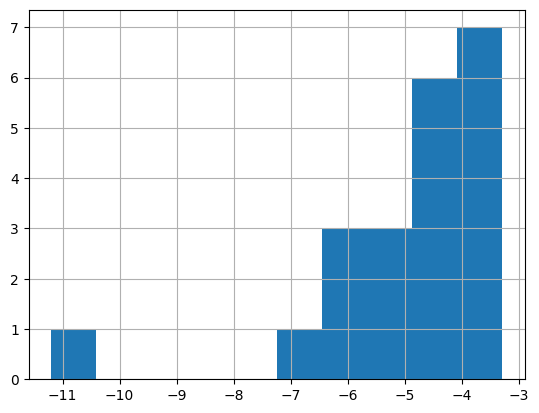

In [ ]:
#do think how distribution translate into colors!!
nj_umploy.cp3_unemprate.hist() #negatively  skewed!

<Axes: >

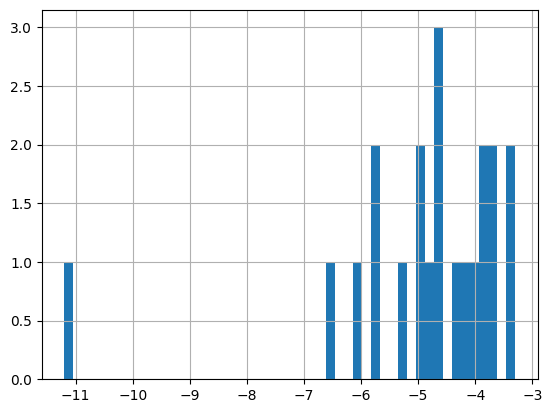

In [ ]:
nj_umploy.cp3_unemprate.hist(bins=50) #see better #negatively skewed and presence of outlier !

<Axes: >

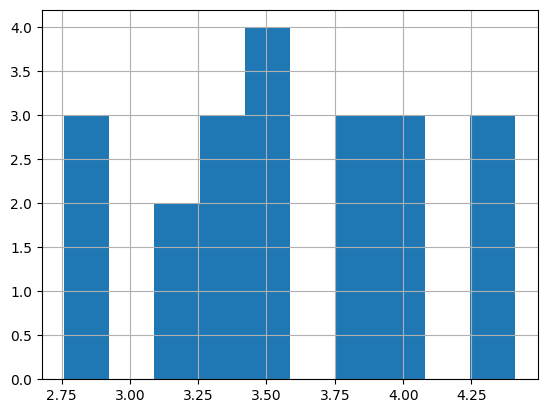

In [ ]:
#do think how distribution translate into colors!!
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist() #minimal skewed!

<Axes: >

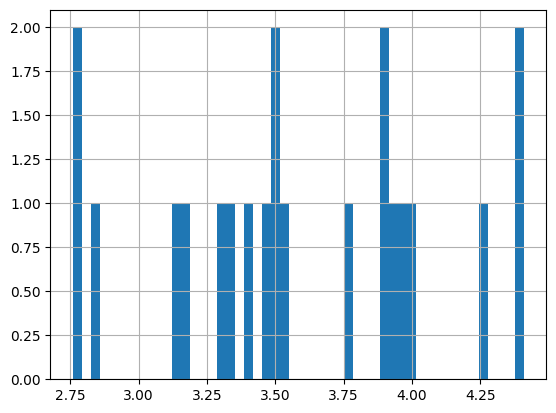

In [ ]:
nj_qualf1.PhysicallyUnhealthyDaysperMo.hist(bins=50) #see better ; Minimal or No Skew: The distribution does not show a strong left or right skew.

<Axes: >

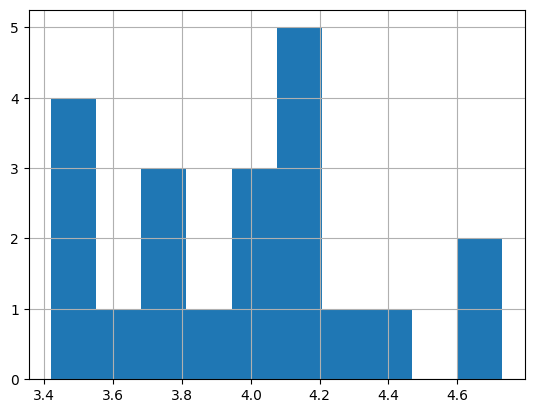

In [ ]:
#do think how distribution translate into colors!!
nj_qualf1.MentallyUnhealthyDaysperMont.hist() #skewed to the right!

<Axes: >

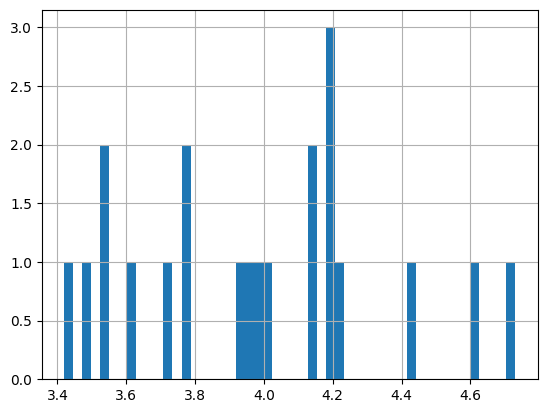

In [ ]:
nj_qualf1.MentallyUnhealthyDaysperMont.hist(bins=50) #see better ; skewed to the right

<Axes: >

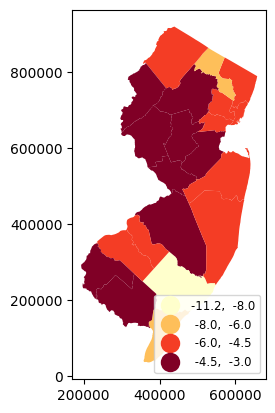

In [ ]:
#your own classification: 2k looks like good cutoff, then 4k and 7k
nj_umploy.plot(column="cp3_unemprate", scheme="user_defined", cmap="YlOrRd", classification_kwds={'bins':[-8, -6, -4.5, -3]},
         linewidth=0, legend=True,legend_kwds= {"fmt": "{:,.1f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})


<Axes: >

[]

[]

<Axes: >

[]

[]

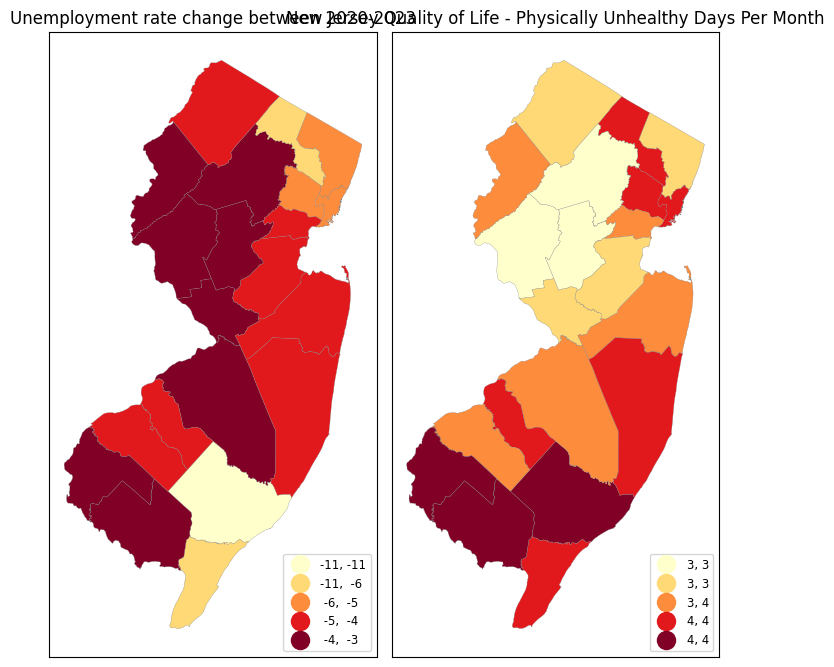

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

[]

[]

<Axes: >

[]

[]

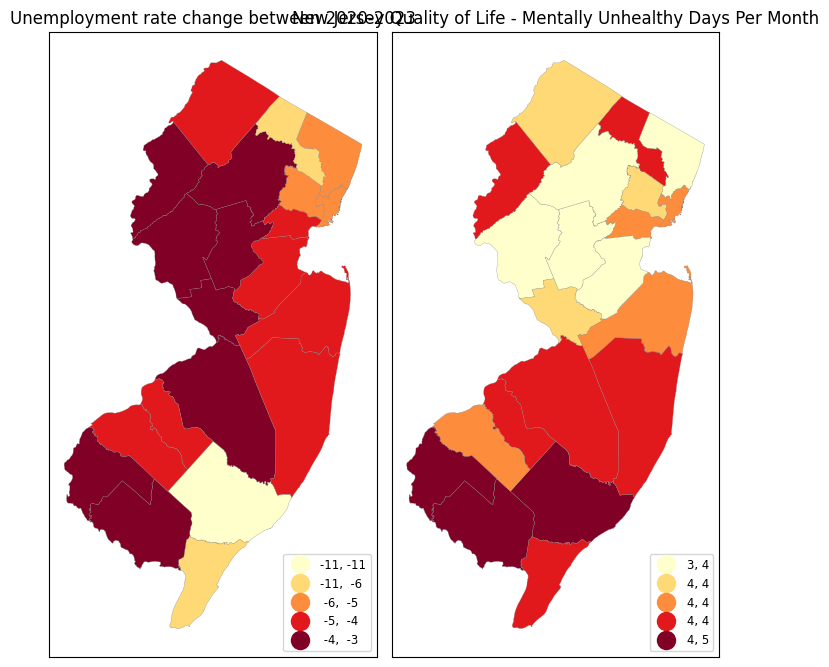

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='MentallyUnhealthyDaysperMont',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])

In [ ]:
print(nj_qualf1.columns)  # Check column names in nj_qualf1

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'PhysicallyUnhealthyDaysperMo',
       'MentallyUnhealthyDaysperMont'],
      dtype='object')


In [ ]:
print(nj_umploy.columns)  # Check column names in nj_umploy

Index(['COUNTY_x', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO',
       'FIPSCO', 'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990',
       'POP1980', 'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980',
       'REGION', 'Shape_Leng', 'Shape_Area', 'geometry', 'COUNTY_y',
       'cp3_unemprate', 'merge_status'],
      dtype='object')


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

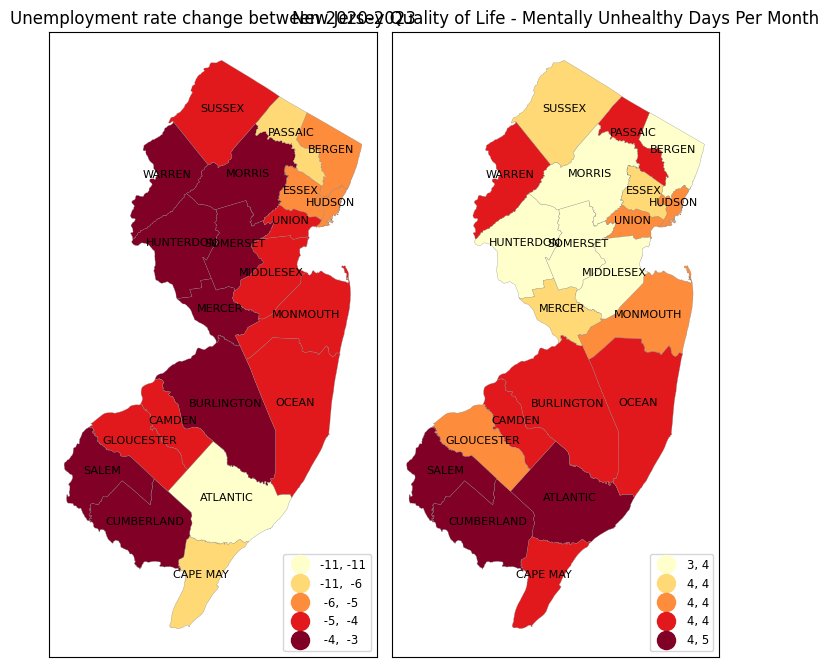

In [ ]:


# Create side-by-side subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(7, 7), sharey=True, tight_layout=True)

# Plot unemployment rate on the first subplot
nj_umploy.plot(ax=axs[0], column='cp3_unemprate', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_yticks([])  # Remove y-axis ticks

# Plot quality of life (Physically Unhealthy Days) on the second subplot
nj_qualf1.plot(ax=axs[1], column='MentallyUnhealthyDaysperMont', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
               edgecolor='grey', linewidth=0.2,
               legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                            'fontsize': 'small', 'markerscale': 1.4})
axs[1].title.set_text("New Jersey Quality of Life - Mentally Unhealthy Days Per Month")
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_yticks([])  # Remove y-axis ticks

# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)

# Show the plot
#plt.show()


<Axes: >

[]

[]

<Axes: >

[]

[]

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

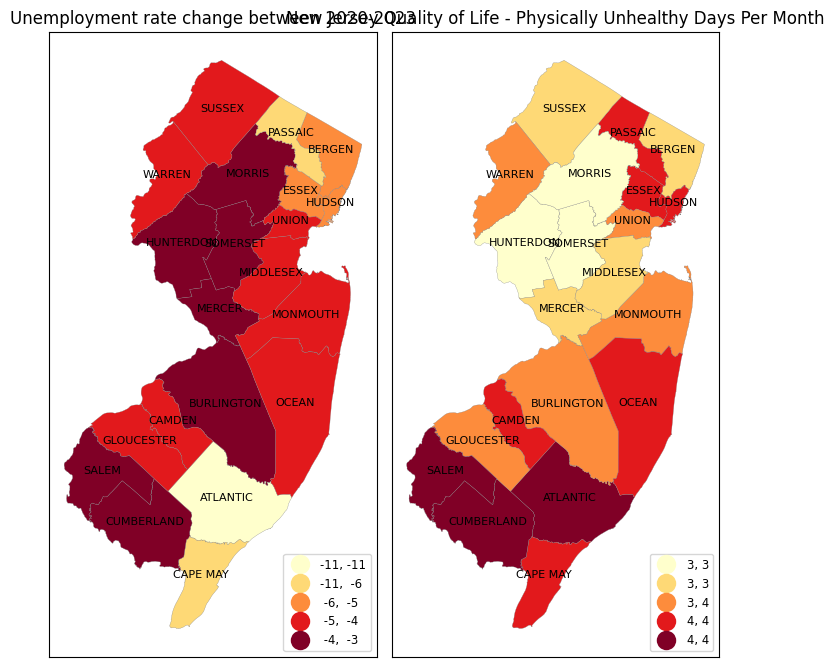

In [ ]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(7,7),sharey=True, tight_layout=True)
nj_umploy.plot(ax=axs[0],column='cp3_unemprate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Unemployment rate change between 2020-2023")
axs[0].set_xticks([]); axs[0].set_yticks([])

nj_qualf1.plot(ax=axs[1],column='PhysicallyUnhealthyDaysperMo',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("New Jersey Quality of Life - Physically Unhealthy Days Per Month")
axs[1].set_xticks([]); axs[1].set_yticks([])


# Annotate the county names in the first plot (unemployment)
for _, row in nj_umploy.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[0].annotate(row['COUNTY_x'], xy=(centroid.x, centroid.y),  # Use axs[0] for the unemployment plot
                    horizontalalignment='center', fontsize=8)

# Optional: Annotate county names in the second plot (quality of life)
for _, row in nj_qualf1.iterrows():
    centroid = row['geometry'].centroid  # Calculate the centroid of each geometry
    axs[1].annotate(row['COUNTY'], xy=(centroid.x, centroid.y),  # Use axs[1] for the quality of life plot
                    horizontalalignment='center', fontsize=8)




**FINDINGS **


Two choropleth maps of New Jersey, each illustrating different data trends across counties:

**TRENDS:**

Counties such as Cumberland, Salem, Camden, Gloucester, and Atlantic are shaded in dark red, indicating the most considerable unemployment rate decreases (ranging from -11.2% to -6.1%).
These southern counties have experienced substantial reductions in unemployment, suggesting that they have seen economic improvements or recovery after higher unemployment.

It is worth noting that Counties with more significant decreases in unemployment (such as Cumberland, Salem, and Atlantic) may have experienced improvements in economic stability, access to jobs, and overall well-being after the pandemic. This could contribute to a better quality of life, as more employment opportunities often lead to improved health outcomes, mental well-being, and reduced stress.


Interestingly, this is in contrast with the report by NJBIA (2024),  that “despite an acceleration in hiring, New Jersey’s unemployment rate rose 0.1 percentage point to 4.8% in December, finishing out the year 1.5 percentage points higher than the jobless rate was at the end of 2022, state labor officials said Thursday” ((NJBIA, 2024).

 From another standpoint, this might be peculiar to counties, not all counties in New Jersey, after the point to factor in. Buttressing this, the output showed a difference in the unemployment change rate, not just a uniform trend in all counties.

Regional Disparities:

 Northern counties, while not showing the same dramatic drop in unemployment, tend to report fewer mentally unhealthy days. This could be due to better healthcare infrastructure, less economic distress, or other socio-economic factors contributing to overall well-being.

There seems to be a higher incidence of physically unhealthy days in the southern counties, which might correlate with other socio-economic factors, including access to healthcare, lifestyle, and economic conditions.



In [ ]:
njP = nj_umploy.copy()

njP["geometry"] = njP["geometry"].centroid

In [ ]:
njP.head(3)



COUNTY_x         COUNTY_LAB   CO             GNIS_NAME    GNIS FIPSSTCO  \
0    ATLANTIC    Atlantic County  ATL    County of Atlantic  882270    34001   
1      BERGEN      Bergen County  BER      County of Bergen  882271    34003   
2  BURLINGTON  Burlington County  BUR  County of Burlington  882272    34005   

  FIPSCO          ACRES    SQ_MILES  POP2010  ...  POPDEN2000  POPDEN1990  \
0      1  390815.404215  610.649069   274549  ...         414         451   
1      3  153490.275182  239.828555   905116  ...        3686        3459   
2      5  525002.683590  820.316693   448734  ...         516         482   

   POPDEN1980        REGION     Shape_Leng    Shape_Area  \
0         335       COASTAL  650228.153906  1.702385e+10   
1        3544  NORTHEASTERN  443326.122021  6.686010e+09   
2         442      SOUTHERN  788906.717476  2.286903e+10   

                        geometry COUNTY_y  cp3_unemprate  merge_status  
0  POINT (446845.671 234718.679)    34001          -11.2          both  
1  POINT (608674.972 775344.901)    34003           -5.3          both  
2    POINT (445015.1 380378.991)    34005           -4.0          both  

[3 rows x 24 columns]

<Axes: >

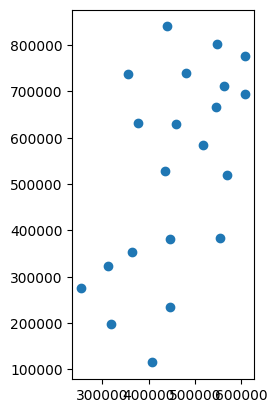

In [ ]:
njP.plot()

Text(446845.6710119825, 234718.67854471222, 'ATLANTIC')

Text(608674.9722903798, 775344.9010704905, 'BERGEN')

Text(445015.10017129, 380378.9908087645, 'BURLINGTON')

Text(362977.140254135, 353705.812773536, 'CAMDEN')

Text(407013.1101691078, 114992.23820242906, 'CAPE MAY')

Text(319542.7506195572, 197359.46040186452, 'CUMBERLAND')

Text(562253.4894992855, 711675.2449585614, 'ESSEX')

Text(311851.0044582621, 322497.09146205307, 'GLOUCESTER')

Text(608428.8356149012, 694107.9908801537, 'HUDSON')

Text(377593.6983420124, 631791.0280015195, 'HUNTERDON')

Text(435852.78759398806, 528228.3056099586, 'MERCER')

Text(516625.77448488685, 584830.6357102671, 'MIDDLESEX')

Text(569736.7056196635, 519774.2489392377, 'MONMOUTH')

Text(479789.7234039994, 738913.4075906109, 'MORRIS')

Text(553566.9451515801, 382793.6503082437, 'OCEAN')

Text(547142.4144700206, 801720.2266180195, 'PASSAIC')

Text(253014.767951469, 275761.56707926694, 'SALEM')

Text(459788.98517990607, 630164.5125108969, 'SOMERSET')

Text(439541.23874521523, 839964.6338105244, 'SUSSEX')

Text(545391.2858900087, 665430.0582508749, 'UNION')

Text(354515.98946147866, 737506.369618912, 'WARREN')

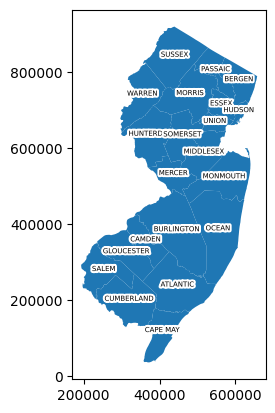

In [ ]:
from matplotlib.patheffects import withStroke
ax=nj_umploy.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(njP.geometry.x, njP.geometry.y, njP.COUNTY_x):
    ax.annotate(label, xy=(x, y),horizontalalignment='center',
    fontsize=5,color='black', #fontweight='bold',
    path_effects=[withStroke(linewidth=3, foreground='white')]) #ytext=(3, 3), textcoords="offset points"

Future Research

**Future Focus **

Future research will examine nonprofits in New Jersey and their contributions to improving the state’s quality of life. Some nonprofit organizations have been part of this recovery process. For instance, Cooper's Ferry Partnership is a community-based organization dedicated to revitalizing Camden. They work on urban redevelopment projects, economic development, and improving the quality of life in Camden's communities.

This study may look into many more social determinant of quality of life and health outcomes in New Jersey.    

Reference **bold text**




LIMITATIONS

Difficulties in understanding the technicalities in sourcing and cleaning useful data.




Reference

NJBIA. (2024, January 18). NJ Unemployment Rate Increases to 4.8%. New Jersey Business & Industry Association. Retrieved from https://njbia.org/nj-unemployment-rate-rises-to-4-8/


# PS3

# REVISITING PS3 = PS4

#OVERVIEW


** Problem Set 3:**

**Overview**

Building on previous analyses of health and economic disparities across New Jersey, Problem Set 3 focuses specifically on Camden County, examining health and quality of life metrics at a finer scale. This analysis seeks to address critical questions about health disparities at the neighborhood level within Camden, highlighting how socioeconomic factors may contribute to observed health outcomes. Camden County has shown some of the highest levels of physically and mentally unhealthy days, making it an ideal case study to explore detailed neighborhood-level trends.


Moving from county-level to neighborhood-level analysis in Camden County is essential for capturing the true diversity of social, economic, and health-related conditions within the county. This approach not only aligns with the critiques of aggregation bias but also enhances the validity of our findings, providing a stronger foundation for targeted public health interventions. By addressing the unique needs of neighborhoods, we can foster more equitable health outcomes and improve quality of life for all residents.


Lastly Camden County was chosen to mitigate the limitations of county-level aggregation, which often risks generalizing findings across diverse neighborhoods, a phenomenon known as the ecological fallacy. Prior research (Robinson, 1950; Jargowsky, 1997) has shown that aggregate data can mask real, localized trends and lead to misleading conclusions. By focusing on Camden neighborhoods, we can achieve a more accurate understanding of health disparities and develop targeted recommendations for public health interventions.

Research Question 1:


How does educational attainment influence quality of life and healthcare access in Camden County?



•	Hypothesis: Census tracts with higher educational attainment (fewer individuals without a high school diploma) have better quality of life, as indicated by higher average family income and lower rates of uninsured individuals.


Research question 2


How do neighborhood-level analyses reveal disparities that may be hidden in county-level data, and what insights can this provide for addressing health and economic inequalities?

•	Hypothesis: Neighborhood-level data will reveal significant socioeconomic and health disparities within Camden County that are not evident in county-level aggregate data.


Research Question 3


Are there significant disparities in health insurance coverage, particularly among elderly residents, across different neighborhoods in Camden County?


•	Hypothesis: There are significant disparities in health insurance coverage among elderly residents across different neighborhoods in Camden County, with lower-income neighborhoods exhibiting higher rates of uninsured elderly individuals compared to higher-income neighborhoods.

Data Sources



Data for this analysis were drawn from the following sources:


•	Social Explorer - Health Data 2020 Release: For physically and mentally unhealthy days per month.



•	New Jersey Average Percentage of People Living in Poverty (2018-2022): To evaluate economic disparities.



**DESCRIPTION OF VARAIBLES**

Geo_TRACT:CensusTract                                            
Pop_16Plus : Population 16 Years and Over
Labor_16Plus: Population 16 Years and Over: In Labor Force                                 
Employed_16Plus : Population 16 Years and Over: In Labor Force: Civilian: Employed             
Unemployed_16Plus: Population 16 Years and Over: In Labor Force: Civilian: Unemployed           
Not_Labor_16Plus: Population 16 Years and Over: Not in the Labor Force                             
Pop_25Plus:  Population 25 Years and Over:                                                
Less_HS_25Plus: Population 25 Years and Over: Less than High School                          
HS_Grads_25Plus : Population 25 Years and Over: High School Graduate (Includes Equivalency)    
Some_College_25Plus: Population 25 Years and Over: Some College                                   
Bachelors_25Plus: Population 25 Years and Over: Bachelor's Degree                              
Masters_25Plus: Population 25 Years and Over: Master's Degree                                
Avg_Fam_Inc: Average Family Income (In 2022 Inflation Adjusted Dollars)                   
Households:Households:                                                                  
Housholds_Public_AssistInc: Households: With Public Assistance Income                                    
Housholds_No_Public_Assist: Households: No Public Assistance Income                                     
Housholds_Retire_Inc: Households: With Retirement Income                                           
Housholds_No_Retir_Inc: Households: No Retirement Income                                             
Total:Total:                                                                      
Total_With_Health_Ins: Total: No Health Insurance Coverage                                          
Total_With_Health_Ins: Total: With Health Insurance Coverage                                        
Pop_25_34: Population 25 to 34:                                                         
Pop_25_34_With_Health_Ins: Population 25 to 34: No Health Insurance Coverage                            
Pop_25_34_With_Health_Ins: Population 25 to 34: With Health Insurance Coverage                          
Pop_65Plus: Population 65 or Older:                                                      
Pop_65Plus_No_Health_Ins: Population 65 or Older: No Health Insurance Coverage                         
Pop_65Plus_With_Health_Ins: Population 65 or Older: With Health Insurance Coverage           

**Unit of Analysis: Census tract**


 ** Focus on Camden County **

Motivation for Camden County Focus

Camden County was chosen as a focal point for several reasons:

1.	Camden County was chosen to mitigate the limitations of county-level aggregation, which often risks generalizing findings across diverse neighborhoods, a phenomenon known as the ecological fallacy. Prior research (Robinson, 1950; Jargowsky, 1997) has shown that aggregate data can mask real, localized trends and lead to misleading conclusions. By focusing on Camden neighborhoods, we can achieve a more accurate understanding of social, economic and health disparities and develop targeted


2.	Need for Detailed Analysis: Aggregate data at the county level may obscure important neighborhood-level variations, leading to potential ecological fallacies or aggregate bias (Robinson, 1998). By focusing on Camden, the study aims to reveal intra-county disparities that may be overlooked in broader analyses.


3.	Historical Socioeconomic Challenges: Camden has faced long-standing socio-economic and health challenges, making it a representative case for studying health and economic disparities at a more localized level.


Note: Why Aggregation Can Lead to Misleading Conclusions (Aggregation bias)

•	Confounding Variables:
•	Uncontrolled Factors:
•	Left-Out Variable Bias:









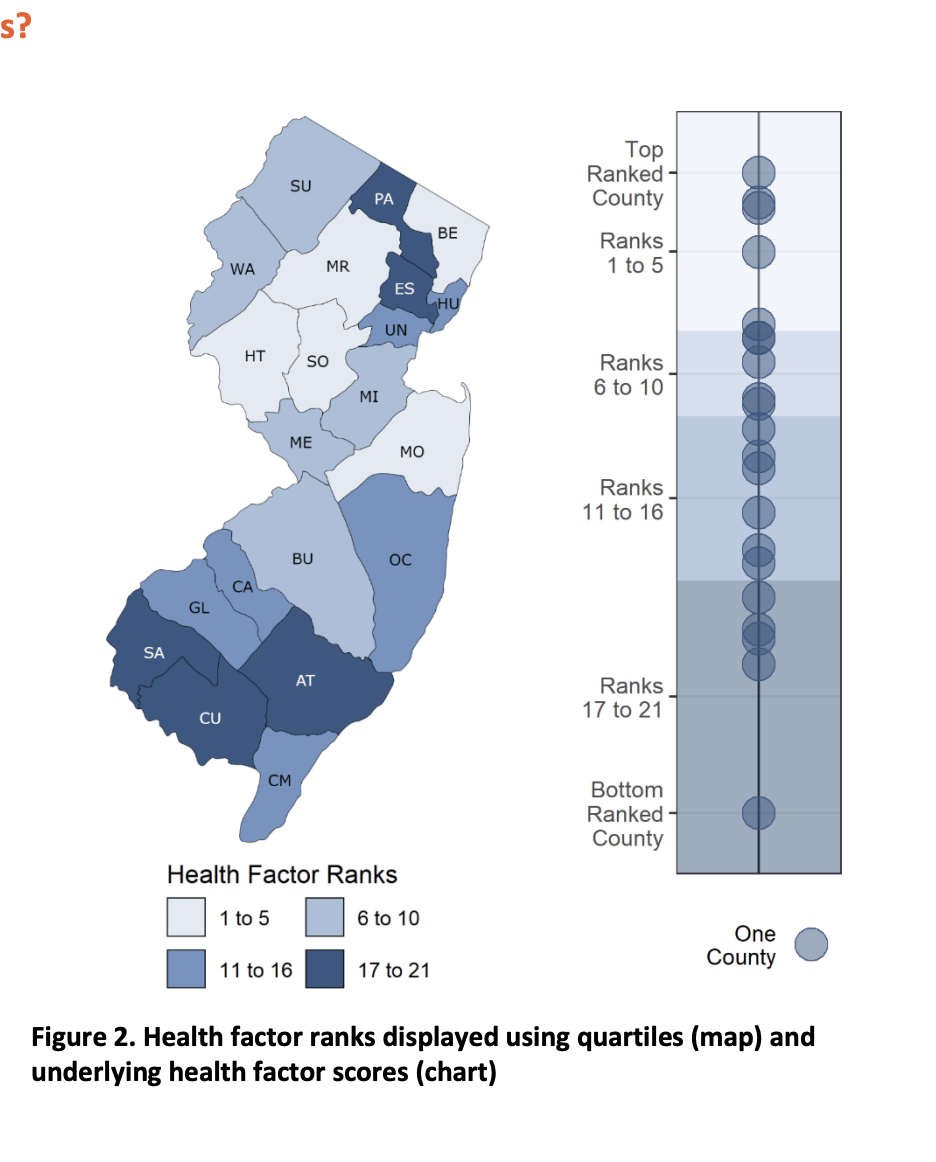



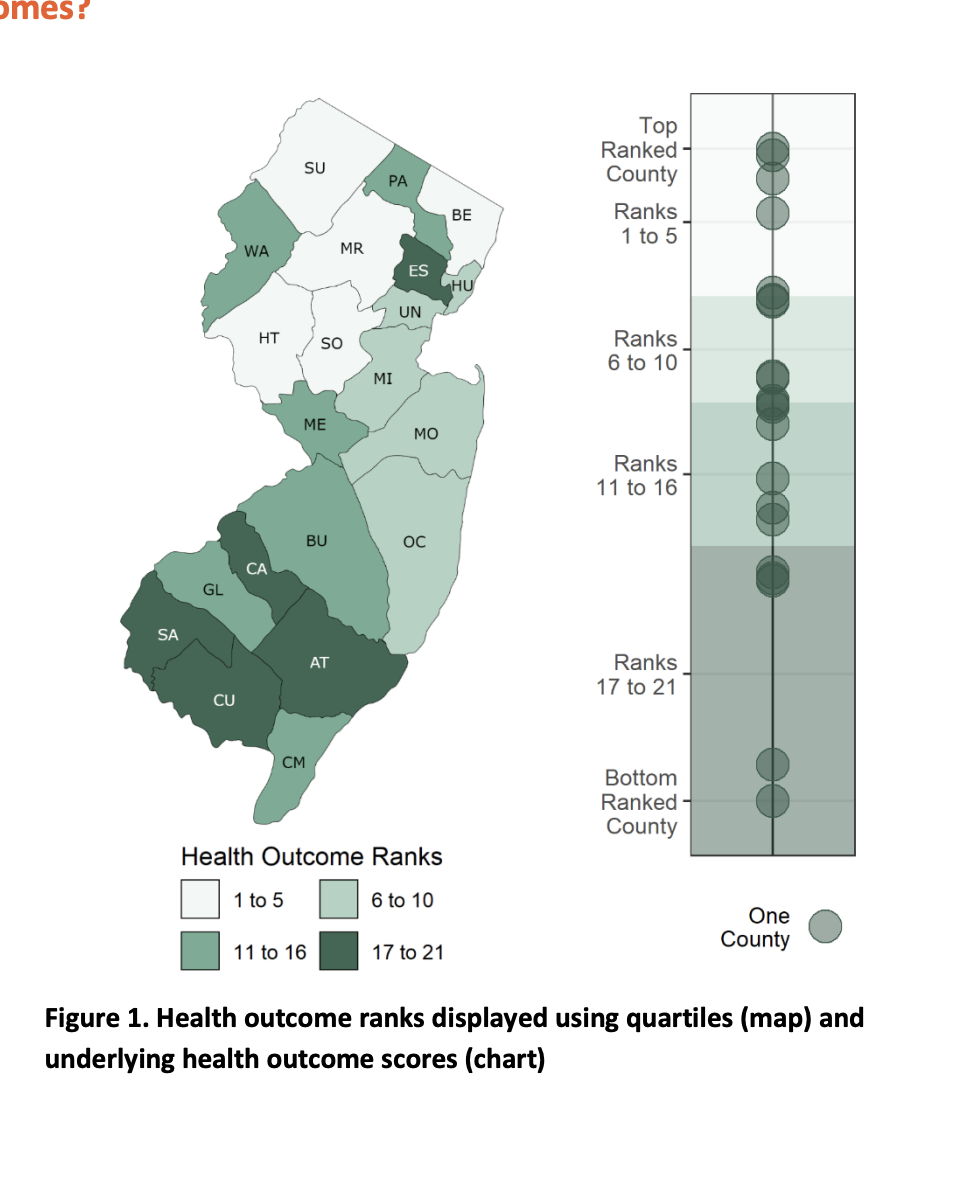










2022 New Jersey County Health Rankings

https://www.countyhealthrankings.org/sites/default/files/media/document/CHR2022_NJ_0.pdf




The green map shows New Jersey’s health outcome rankings by county. The map is divided into four quartiles with less color intensity indicating better health outcomes. Specific county ranks can be found in the table on page 2.



Some of the Selected Variables:
1.	Educational Attainment: This is a fundamental social determinant that strongly influences a person's opportunities, income potential, and overall well-being.

2.	Household with Income Assistance: This variable reflects economic hardship and the need for social safety nets.

3.	Employment Over Years and Above: Employment provides income, social connections, and a sense of purpose, all of which contribute to quality of life. Unemployment or underemployment can negatively impact individuals and communities.


Rationale:

These three variables represent key dimensions of social determinants that have a significant impact on quality of life:
•	Education: Provides a foundation for personal and economic growth.
•	Income Assistance: Addresses basic needs and economic security.
•	Employment: Enables economic participation and social integration.



# WORKINGS

In [1]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

shapefile

In [4]:
import gdown

Downloading...
From: https://drive.google.com/uc?export=download&id=1bYSXS5tARK7u6iUElpCa6FlxboyKJErb
To: /content/Census_Tracts.zip
100%|██████████| 255k/255k [00:00<00:00, 75.5MB/s]


'Census_Tracts.zip'

<Figure size 1500x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Map of Camden Showing Census Tracts')

<Figure size 1500x1500 with 0 Axes>

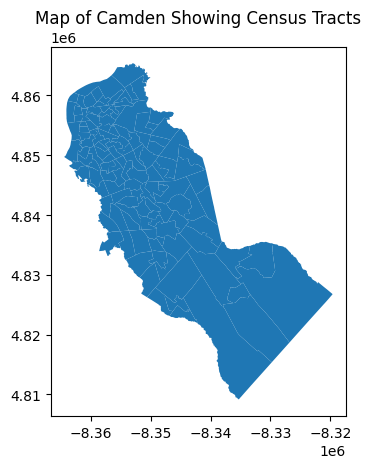

In [5]:
download_url = f'https://drive.google.com/uc?export=download&id=1bYSXS5tARK7u6iUElpCa6FlxboyKJErb'
output_filename = 'Census_Tracts.zip'
gdown.download(download_url, output_filename, quiet=False)

with zipfile.ZipFile(output_filename, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')
wd_map = gpd.read_file('extracted_files/Census_Tracts.shp')

plt.figure(figsize=(15, 15))
wd_map.plot()
plt.title('Map of Camden Showing Census Tracts')
plt.show()

In [6]:
# Print the head of the GeoDataFrame
print(wd_map.head())

   OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10   NAME10  \
0         1        34        007    607505  34007607505  6075.05   
1         2        34        007    603800  34007603800     6038   
2         3        34        007    603002  34007603002  6030.02   
3         4        34        007    601101  34007601101  6011.01   
4         5        34        007    601200  34007601200     6012   

             NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Census Tract 6075.05   G5020          S  6400124    121277  +39.8309199   
1     Census Tract 6038   G5020          S  2164187     80527  +39.9168160   
2  Census Tract 6030.02   G5020          S  1433723         0  +39.9565411   
3  Census Tract 6011.01   G5020          S   740247         0  +39.9486791   
4     Census Tract 6012   G5020          S   805794         0  +39.9445110   

     INTPTLON10                                           geometry  
0  -074.9446096  POLYGON ((-8342957.202 4844363.749, 

Importing Files

In [7]:
#https://github.com/mvs110/GIS-FALL/blob/main/social%20explorer_social%20determinant%20data.csv

In [8]:
#https://github.com/mvs110/GIS-FALL/blob/main/SocDeterminant_Main%20(2)_New%201.csv

In [9]:
import pandas as pd

# Correct raw CSV URL from GitHub
raw_csv_url = 'https://github.com/mvs110/GIS-FALL/raw/refs/heads/main/SocDeterminant_Main%20(2)_New%201.csv'

# Read the CSV file, skipping the first row and specifying the delimiter if needed
Cam_sdeterm = pd.read_csv(raw_csv_url, skiprows=1, sep=',')  # Assuming the delimiter is a comma
print(Cam_sdeterm.head())


   Geo_TRACT  Pop_16yrs_Over  Labor_16Plus  Employed_16Plus  \
0     600200            1543           808              577   
1     600400            1959           713              469   
2     600700             967           560              496   
3     600800            3974          1520             1304   
4     600900            2624          1443             1307   

   Unemployed_16Plus  Not_Labor_16Plus  Pop_25Plus  Less_HS_25Plus  \
0                231               735        1277             335   
1                244              1246        1623             654   
2                 64               407         807             345   
3                216              2454        3062            1258   
4                136              1181        2092            1213   

   HS_Grads_25Plus  Some_College_25Plus  ...  Housholds_No_Retir_Inc  Total  \
0              596                  200  ...                     472   1693   
1              295                  341  .

In [10]:
# Check data types of each column
data_types = Cam_sdeterm.dtypes

In [11]:
# Print the data types
print(data_types)


Geo_TRACT                       int64
Pop_16yrs_Over                  int64
Labor_16Plus                    int64
Employed_16Plus                 int64
Unemployed_16Plus               int64
Not_Labor_16Plus                int64
Pop_25Plus                      int64
Less_HS_25Plus                  int64
HS_Grads_25Plus                 int64
Some_College_25Plus             int64
Bachelors_25Plus                int64
Masters_25Plus                  int64
Avg_Fam_Inc                   float64
Households                      int64
Housholds_Public_AssistInc      int64
Housholds_No_Public_Assist      int64
Housholds_Retire_Inc            int64
Housholds_No_Retir_Inc          int64
Total                           int64
Total_No_Health_Ins             int64
Total_With_Health_Ins           int64
Pop_25_34                       int64
Pop_25_34_No_Health_Ins         int64
Pop_25_34_With_Health_Ins       int64
Pop_65Plus                      int64
Pop_65Plus_No_Health_Ins        int64
Pop_65Plus_W

In [12]:
Cam_sdeterm.head(25)

Geo_TRACT  Pop_16yrs_Over  Labor_16Plus  Employed_16Plus  \
0      600200            1543           808              577   
1      600400            1959           713              469   
2      600700             967           560              496   
3      600800            3974          1520             1304   
4      600900            2624          1443             1307   
5      601000            4390          2868             2589   
6      601101            2280          1347             1294   
7      601102            3803          2137             1856   
8      601200            4780          3201             3011   
9      601300            3546          2346             1955   
10     601400            3413          1709             1262   
11     601500            4257          2589             2102   
12     601600            1907          1143             1013   
13     601700            1785           977              724   
14     601800             628           376              344   
15     601900            1802          1103             1002   
16     602000            3830          2304             1731   
17     602503            1975          1241             1125   
18     602601            2354          1455             1321   
19     602602            2825          1963             1754   
20     602901            4266          2839             2764   
21     602902            2300          1564             1428   
22     603001            3292          2407             2051   
23     603002            3536          2533             2256   
24     603100            3081          2143             2089   

    Unemployed_16Plus  Not_Labor_16Plus  Pop_25Plus  Less_HS_25Plus  \
0                 231               735        1277             335   
1                 244              1246        1623             654   
2                  64               407         807             345   
3                 216              2454        3062            1258   
4                 136              1181        2092            1213   
5                 279              1522        3340            1121   
6                  53               933        1848             780   
7                 281              1666        2965            1132   
8                 190              1579        3697            1054   
9                 391              1200        2930             966   
10                447              1704        2641             833   
11                487              1668        3737             829   
12                130               764        1669             528   
13                253               808        1287             240   
14                 32               252         572             170   
15                101               699        1607             364   
16                573              1526        3386             431   
17                106               734        1757             394   
18                134               899        1963             353   
19                209               862        2160             614   
20                 75              1427        3703             238   
21                136               736        2102             240   
22                356               885        2939             419   
23                266              1003        2890             632   
24                 54               938        2517             190   

    HS_Grads_25Plus  Some_College_25Plus  ...  Housholds_No_Retir_Inc  Total  \
0               596                  200  ...                     472   1693   
1               295                  341  ...                     789   2766   
2               251                  131  ...                     329   1338   
3              1034                  681  ...                    1461   5018   
4               464                  367  ...                    1133   3798   
5           

In [13]:
print(Cam_sdeterm.columns)

Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')


In [14]:
# Print the columns of the DataFrame
print("Columns in Cam_sdeterm:")
print(Cam_sdeterm.columns)

Columns in Cam_sdeterm:
Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')


In [15]:
# Print columns of both DataFrames
print("Columns in wd_map:")
print(wd_map.columns)
print("\nColumns in Cam_sdeterm:")
print(Cam_sdeterm.columns)

Columns in wd_map:
Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

Columns in Cam_sdeterm:
Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')


In [16]:
# Print the column titles
print(Cam_sdeterm.columns)

Index(['Geo_TRACT', 'Pop_16yrs_Over', 'Labor_16Plus', 'Employed_16Plus',
       'Unemployed_16Plus', 'Not_Labor_16Plus', 'Pop_25Plus', 'Less_HS_25Plus',
       'HS_Grads_25Plus', 'Some_College_25Plus', 'Bachelors_25Plus',
       'Masters_25Plus', 'Avg_Fam_Inc', 'Households',
       'Housholds_Public_AssistInc', 'Housholds_No_Public_Assist',
       'Housholds_Retire_Inc', 'Housholds_No_Retir_Inc', 'Total',
       'Total_No_Health_Ins', 'Total_With_Health_Ins', 'Pop_25_34',
       'Pop_25_34_No_Health_Ins', 'Pop_25_34_With_Health_Ins', 'Pop_65Plus',
       'Pop_65Plus_No_Health_Ins', 'Pop_65Plus_With_Health_Ins'],
      dtype='object')


In [17]:
# Print columns vertically using a loop
for column in Cam_sdeterm.columns:
    print(column)

Geo_TRACT
Pop_16yrs_Over
Labor_16Plus
Employed_16Plus
Unemployed_16Plus
Not_Labor_16Plus
Pop_25Plus
Less_HS_25Plus
HS_Grads_25Plus
Some_College_25Plus
Bachelors_25Plus
Masters_25Plus
Avg_Fam_Inc
Households
Housholds_Public_AssistInc
Housholds_No_Public_Assist
Housholds_Retire_Inc
Housholds_No_Retir_Inc
Total
Total_No_Health_Ins
Total_With_Health_Ins
Pop_25_34
Pop_25_34_No_Health_Ins
Pop_25_34_With_Health_Ins
Pop_65Plus
Pop_65Plus_No_Health_Ins
Pop_65Plus_With_Health_Ins


In [18]:
# Method 1: Using a loop
for column in wd_map.columns:
    print(column)


OBJECTID
STATEFP10
COUNTYFP10
TRACTCE10
GEOID10
NAME10
NAMELSAD10
MTFCC10
FUNCSTAT10
ALAND10
AWATER10
INTPTLAT10
INTPTLON10
geometry


In [19]:
# Change the name of a column using the 'rename' method
#wd_map = wd_map.rename(columns={'old_column_name': 'new_column_name'})

In [20]:
wd_map = wd_map.rename(columns={'TRACTCE10': 'Geo_TRACT'})
print(wd_map.columns)  # Print the updated column names

Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'Geo_TRACT', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')


**MERGING **

Merging:

proceed with merging the DataFrames using the pd.merge() function as described in my previous response, using 'Geo_TRACT' as the common column:

In [21]:
# Convert 'Geo_TRACT' column in wd_map to int64 to match Cam_sdeterm
wd_map['Geo_TRACT'] = pd.to_numeric(wd_map['Geo_TRACT'])

# Now perform the merge
#merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='left')

In [22]:
merged_data = pd.merge(wd_map, Cam_sdeterm, on='Geo_TRACT', how='left', indicator='merge_status')

In [23]:
# Examine the 'merge_status' column
print(merged_data['merge_status'].value_counts())

merge_status
both          125
left_only       2
right_only      0
Name: count, dtype: int64


In [24]:
Cam_sdeterm.dtypes

Geo_TRACT                       int64
Pop_16yrs_Over                  int64
Labor_16Plus                    int64
Employed_16Plus                 int64
Unemployed_16Plus               int64
Not_Labor_16Plus                int64
Pop_25Plus                      int64
Less_HS_25Plus                  int64
HS_Grads_25Plus                 int64
Some_College_25Plus             int64
Bachelors_25Plus                int64
Masters_25Plus                  int64
Avg_Fam_Inc                   float64
Households                      int64
Housholds_Public_AssistInc      int64
Housholds_No_Public_Assist      int64
Housholds_Retire_Inc            int64
Housholds_No_Retir_Inc          int64
Total                           int64
Total_No_Health_Ins             int64
Total_With_Health_Ins           int64
Pop_25_34                       int64
Pop_25_34_No_Health_Ins         int64
Pop_25_34_With_Health_Ins       int64
Pop_65Plus                      int64
Pop_65Plus_No_Health_Ins        int64
Pop_65Plus_With_Health_Ins      int64
dtype: object

<Axes: >

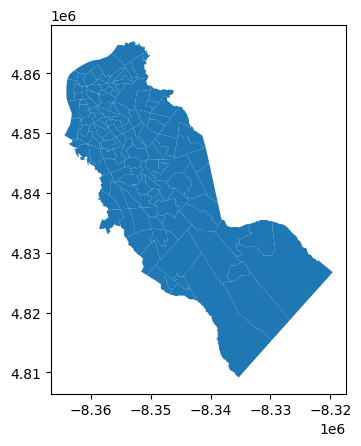

In [25]:
wd_map.plot()

<Axes: >

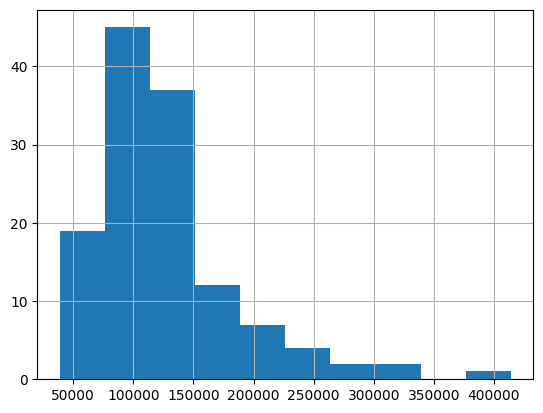

In [26]:
#do think how distribution translate into colors!!
Cam_sdeterm.Avg_Fam_Inc.hist() #positively skilled   skewed!

<Axes: >

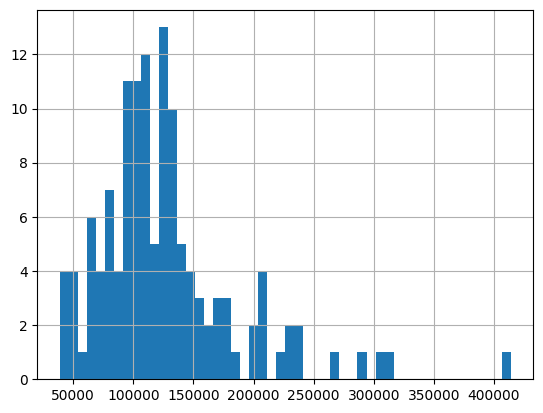

In [27]:
#do think how distribution translate into colors!!
Cam_sdeterm.Avg_Fam_Inc.hist(bins=50) #postively   skewed!

<Axes: >

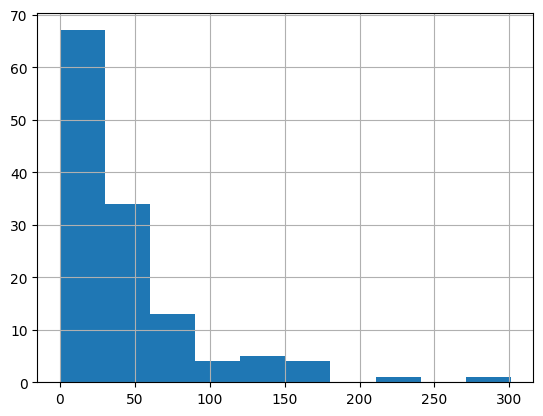

In [28]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_Public_AssistInc.hist() #positively  skewed!

<Axes: >

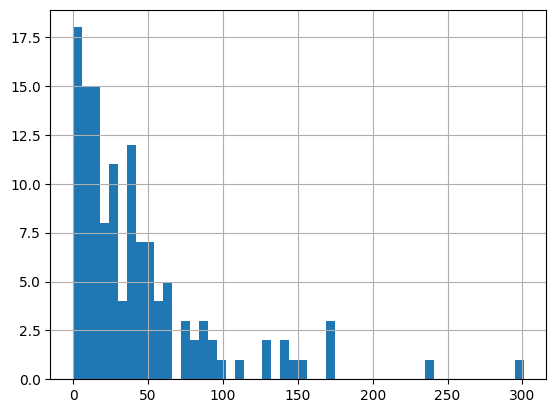

In [29]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_Public_AssistInc.hist(bins=50) #positively  skewed!

<Axes: >

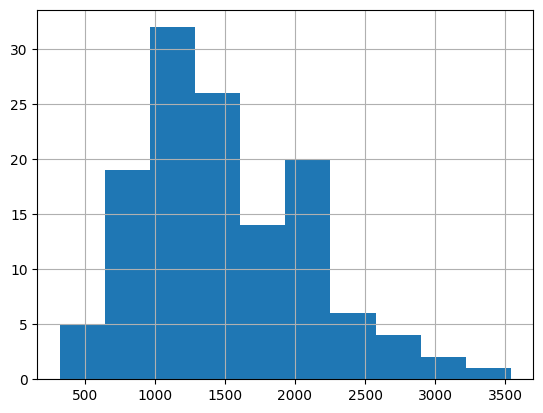

In [30]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_No_Public_Assist.hist() #positively  skewed!

<Axes: >

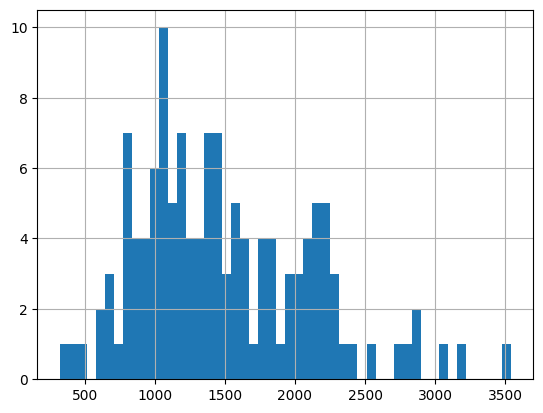

In [31]:
#do think how distribution translate into colors!!
Cam_sdeterm.Housholds_No_Public_Assist.hist(bins=50) #positively  skewed!

<Axes: >

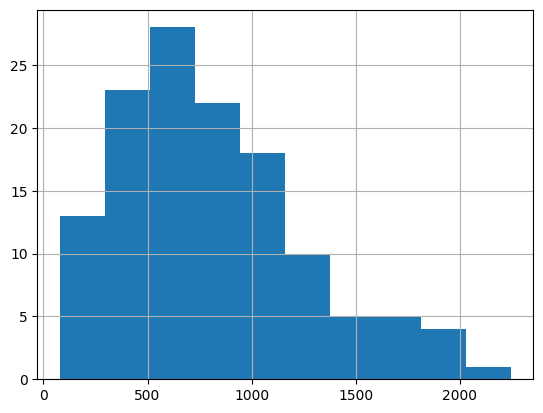

In [32]:
#do think how distribution translate into colors!!
Cam_sdeterm.HS_Grads_25Plus.hist() #positively  skewed!

<Axes: >

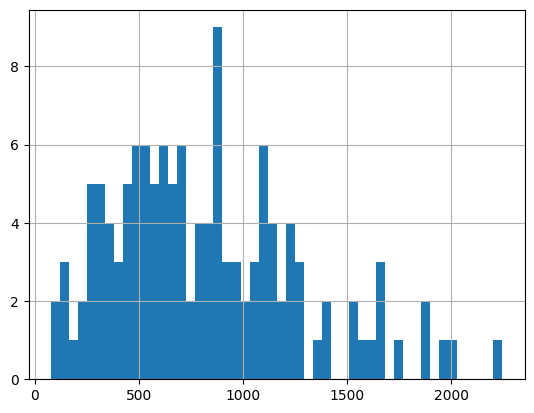

In [33]:
#do think how distribution translate into colors!!
Cam_sdeterm.HS_Grads_25Plus.hist(bins=50) #positively  skewed!

<Axes: >

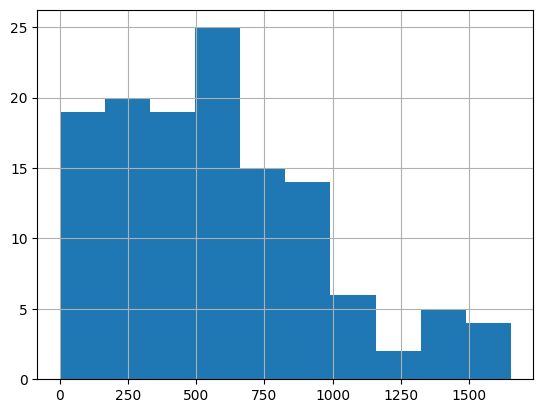

In [34]:
#do think how distribution translate into colors!!
Cam_sdeterm.Bachelors_25Plus.hist() #positively  skewed!
#A right-skewed distribution typically indicates that while most observations fall within the lower range of values, there are a few higher values (outliers) pulling the mean to the right.

A right-skewed distribution typically indicates that while most observations fall within the lower range of values, there are a few higher values (outliers) pulling the mean to the right.

<Axes: >

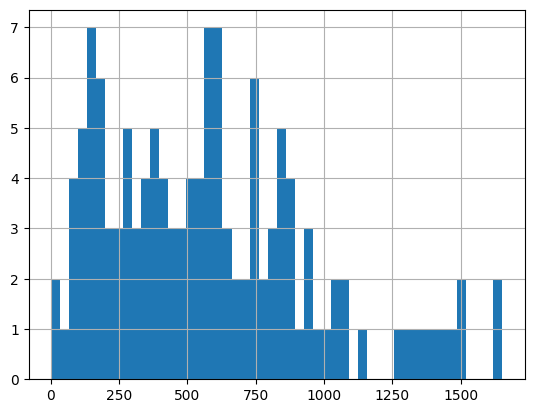

In [35]:
#do think how distribution translate into colors!!
Cam_sdeterm.Bachelors_25Plus.hist(bins=50) #positively  skewed!



Two Side-by-Side Comparisons:

**Education and Income

**Education and Employment

**Education and Employment


<Axes: >

[]

[]

<Axes: >

[]

[]

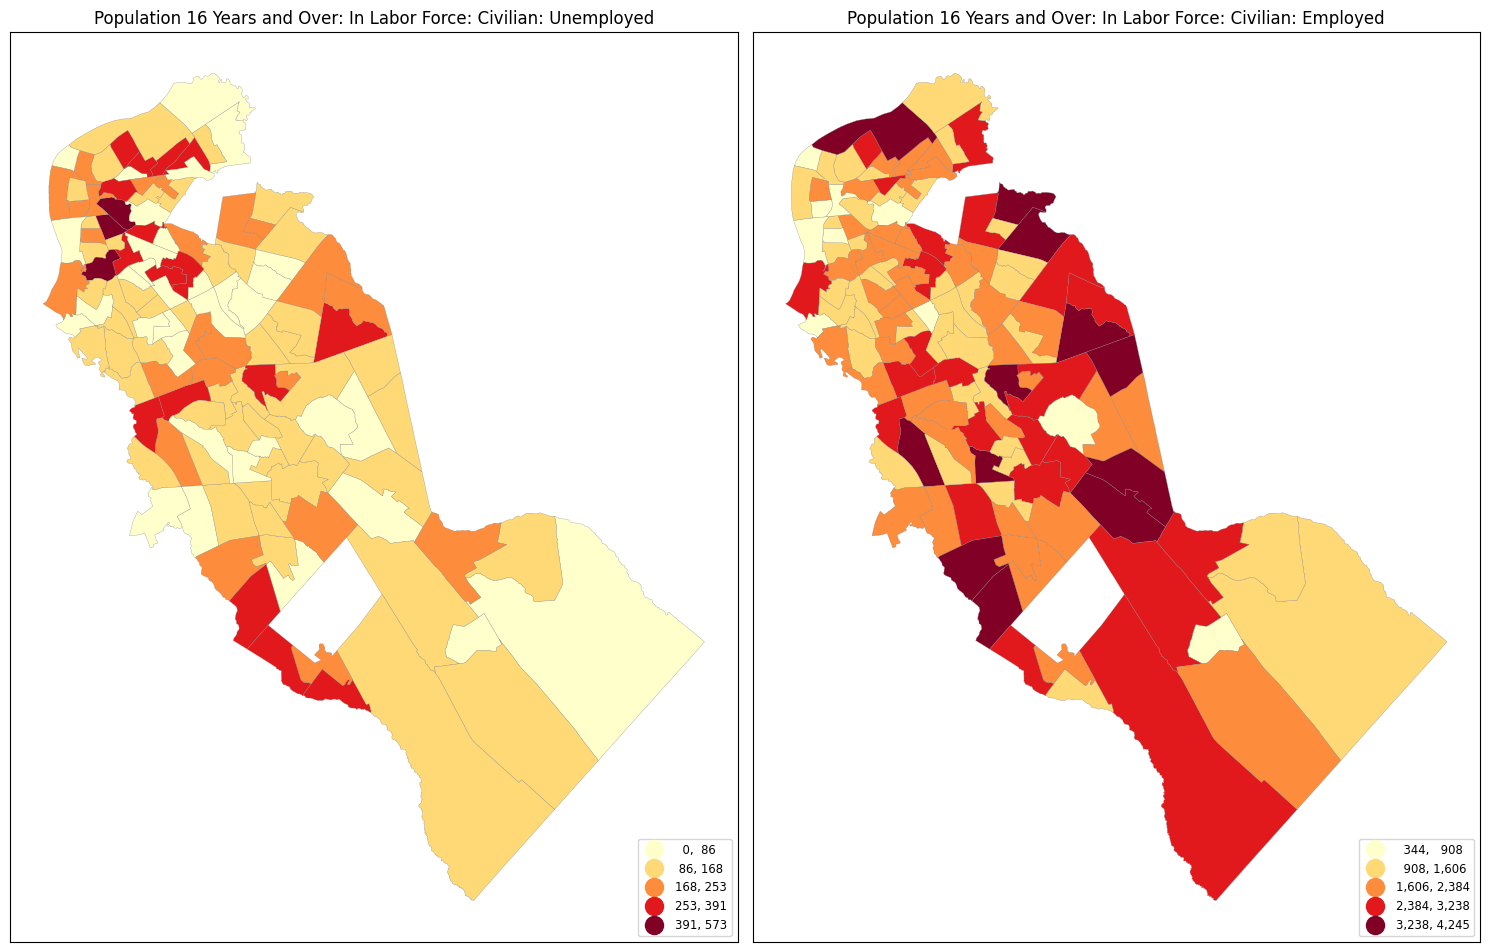

In [36]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True)
merged_data.plot(ax=axs[0],column='Unemployed_16Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 16 Years and Over: In Labor Force: Civilian: Unemployed")
axs[0].set_xticks([]); axs[0].set_yticks([])
merged_data.plot(ax=axs[1],column='Employed_16Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 16 Years and Over: In Labor Force: Civilian: Employed")
axs[1].set_xticks([]); axs[1].set_yticks([])

Educational attainment at 25years and over

<Axes: >

[]

[]

<Axes: >

[]

[]

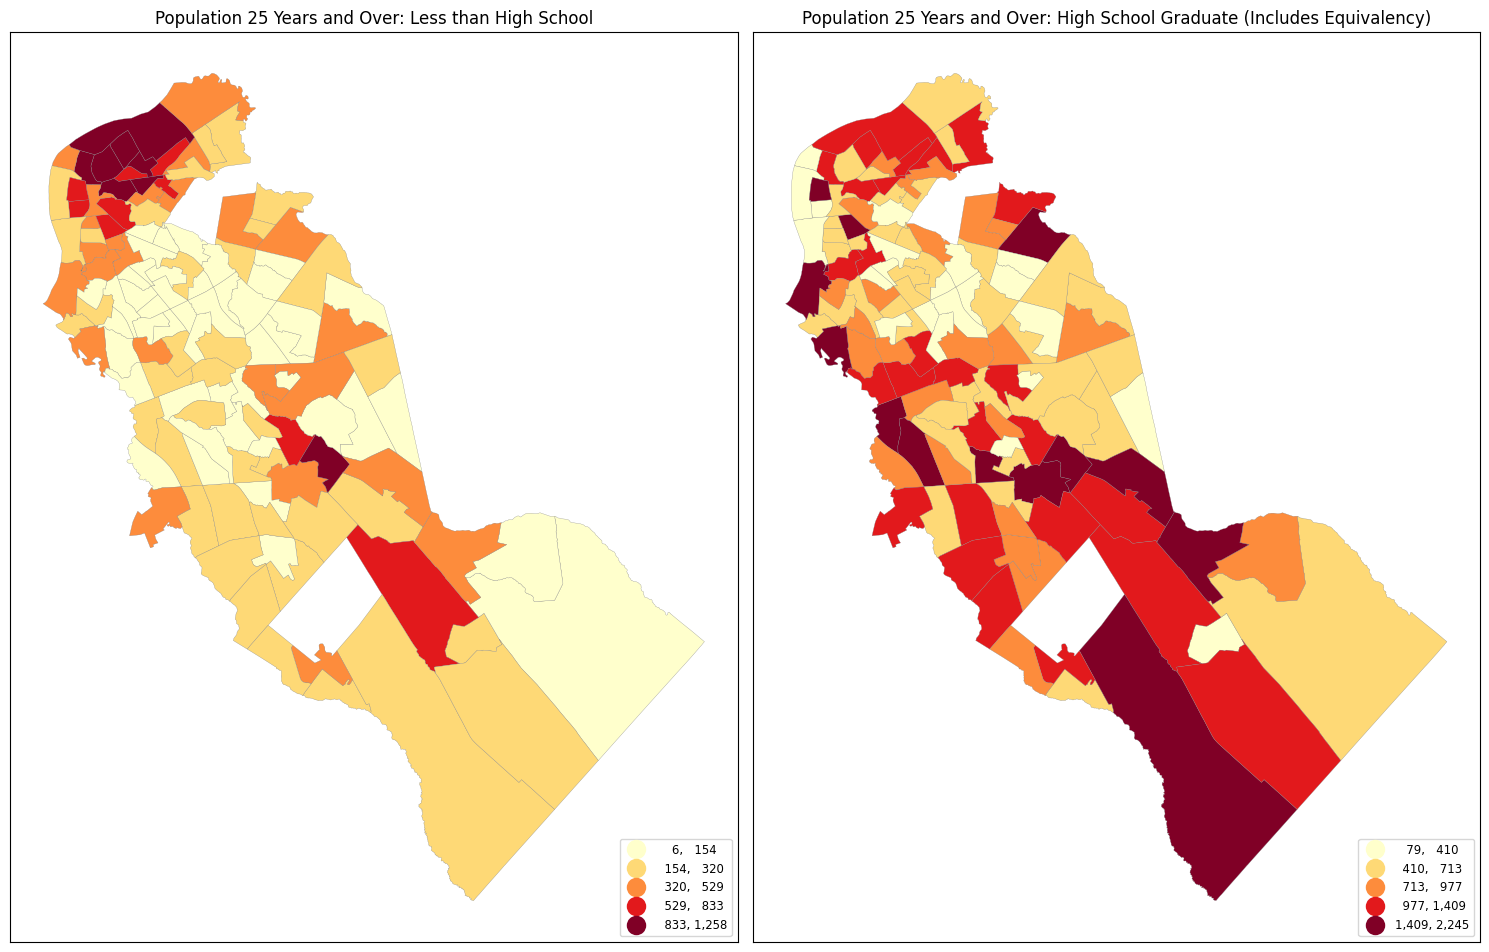

In [37]:
#side-by-side: subplots 1row,2col; then just axs[0] and axs[1]
fig, axs = plt.subplots(1,2, figsize=(15,10),sharey=True, tight_layout=True)
merged_data.plot(ax=axs[0],column='Less_HS_25Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population 25 Years and Over: Less than High School")
axs[0].set_xticks([]); axs[0].set_yticks([])
merged_data.plot(ax=axs[1],column='HS_Grads_25Plus',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Population 25 Years and Over: High School Graduate (Includes Equivalency)")
axs[1].set_xticks([]); axs[1].set_yticks([])

TRENDS IN INSURANCE COVERAGE



Total, Total: No Health insurance coverage, Total:With health insurance coverage

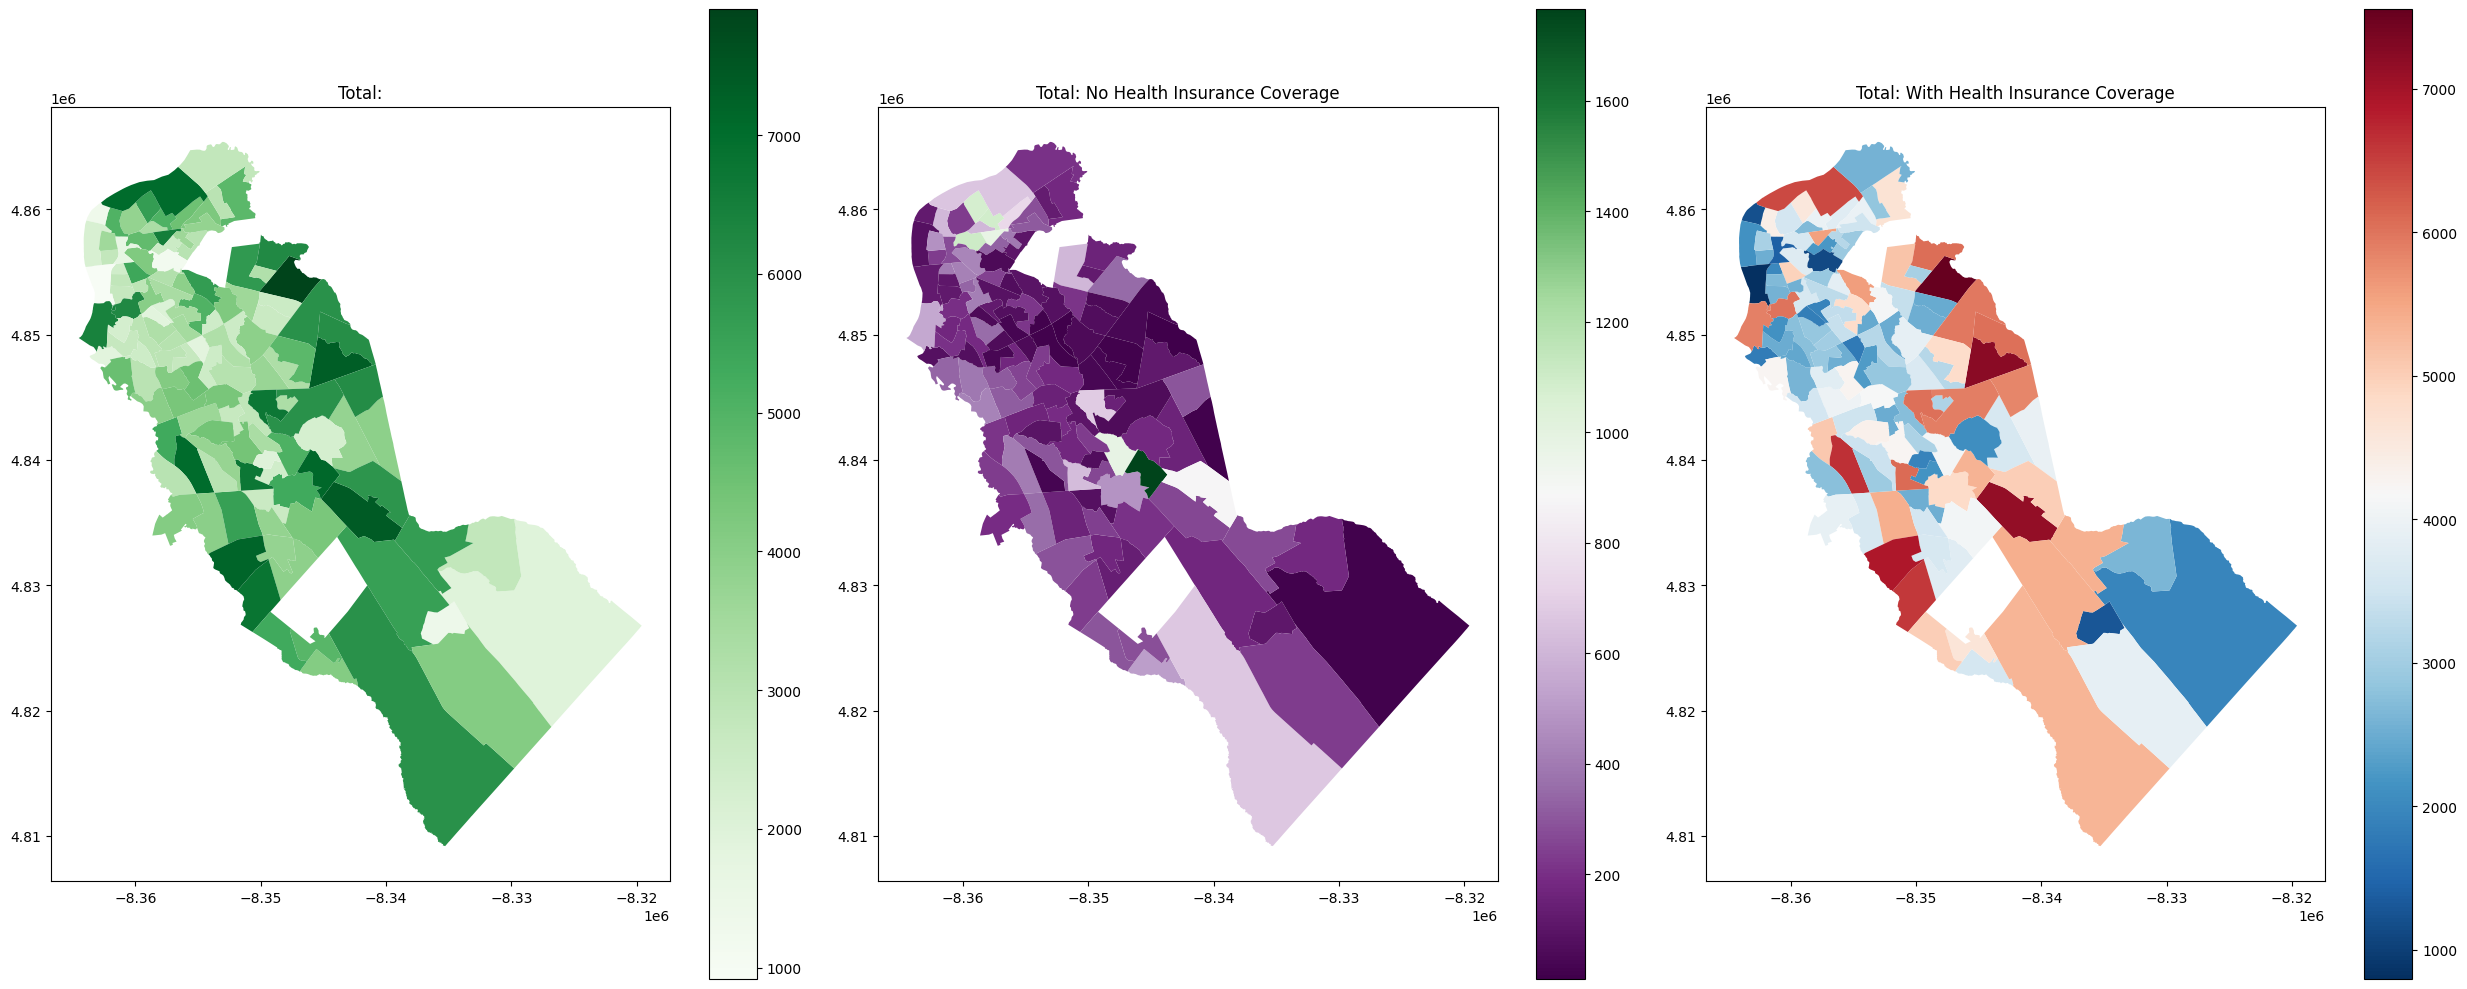

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

#"BuGn""YlGn""winter""spring""PRGn""RdBu"

fig, axes = plt.subplots(1, 3, figsize=(25, 10))  # 1 row, 3 columns

# Map 1: Educational Attainment
merged_data.plot(column='Total', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Total:')

# Map 2: Household with Income Assistance
merged_data.plot(column='Total_No_Health_Ins', cmap='PRGn', legend=True, ax=axes[1])
axes[1].set_title('Total: No Health Insurance Coverage')

# Map 3: Employment Over 16 Years and Above
merged_data.plot(column='Total_With_Health_Ins', cmap='RdBu_r', legend=True, ax=axes[2])
axes[2].set_title('Total: With Health Insurance Coverage')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

Disparities:

There are clear disparities in health insurance coverage across Camden County. Some areas have high populations but relatively low insurance coverage, suggesting gaps in healthcare access.



**1. Total Population (Left Map - Green Gradient)**

  **Observation:**


The total population is not uniformly distributed across Camden County. Higher population densities are concentrated in the central and northern parts of the county (darker green), corresponding to urbanized areas like Camden City.


Suburban and rural areas in the southern and southeastern regions show lower population densities (lighter green).

**Implication:**

Urban areas like Camden City have a higher concentration of residents, which aligns with the need for extensive public services, including health and social services.

Lower population density in suburban and rural areas may reflect differences in housing types (e.g., single-family homes) and economic stability.



**2. Total Households Without Health Insurance (Middle Map - Purple Gradient)**

**Observation:**

Households without health insurance are heavily concentrated in urban areas like Camden City (darker purple regions).


Suburban areas show significantly fewer uninsured households (lighter purple), with some areas having almost no uninsured households.

**Implication:**

 Camden City faces substantial health access disparities. This could be due to factors like unemployment, low incomes, or lack of employer-sponsored health insurance.


 **3. Total Households With Health Insurance Coverage (Right Map - Blue-Red Gradient)**

** Observation:**

 Suburban areas (e.g., Cherry Hill, Voorhees) have higher rates of health insurance coverage (blue shades), indicating widespread access to private or employer-sponsored health insurance.
        
        
Urban areas like Camden City show lower health insurance coverage (red shades), which correlates with the high uninsured rates in the previous map.


**Implication:**


Health insurance disparities highlight a systemic inequity in Camden County. Suburban residents are more likely to have stable employment with health benefits, while urban households rely more on Medicaid or remain uninsured.

HOUSEHOLD ASSISTED INCOME by CENSUS TRACT

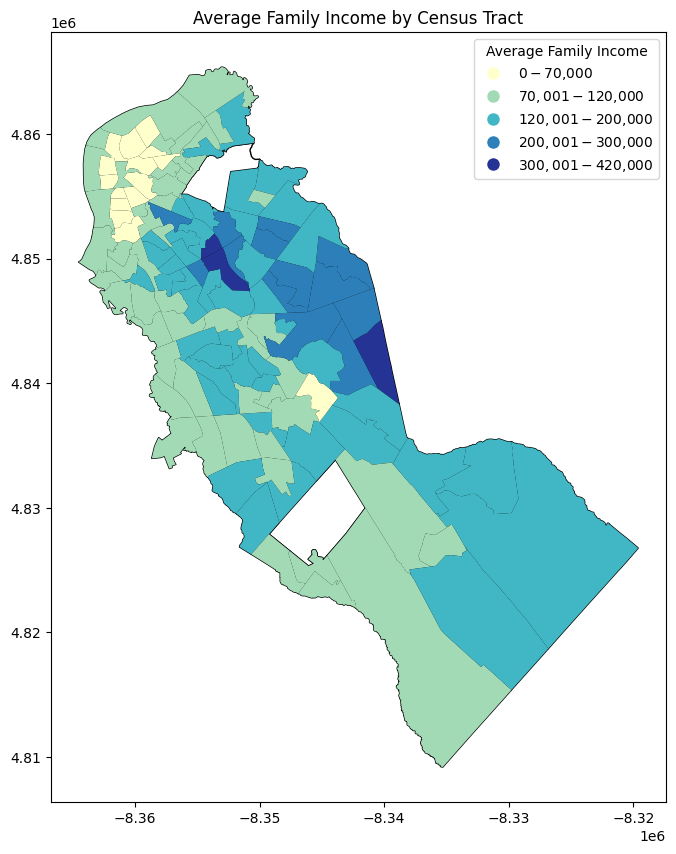

In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import geopandas as gpd

# Define income bins, labels, and colors
income_bins = [0, 70000, 120000, 200000, 300000, 420000]
income_labels = [
    '$0 - $70,000', '$70,001 - $120,000', '$120,001 - $200,000',
    '$200,001 - $300,000', '$300,001 - $420,000' # Added a label to match the number of bins
]
# Extend color palette to match the number of bins
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

# Create a new column 'income_category' based on income bins and labels
merged_data['income_category'] = pd.cut(merged_data['Avg_Fam_Inc'], bins=income_bins, labels=income_labels)

# Set up custom color map and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(income_bins, cmap.N)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the base layer with white background and black borders (if needed, replace `wd_map` with `merged_data`)
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot the income categories on the map
merged_data.plot(ax=ax, column='income_category', cmap=cmap, legend=False)

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in zip(colors, income_labels)
]

# Display custom legend
ax.legend(handles=handles, title='Average Family Income')

# Set the title
plt.title('Average Family Income by Census Tract')
plt.show();


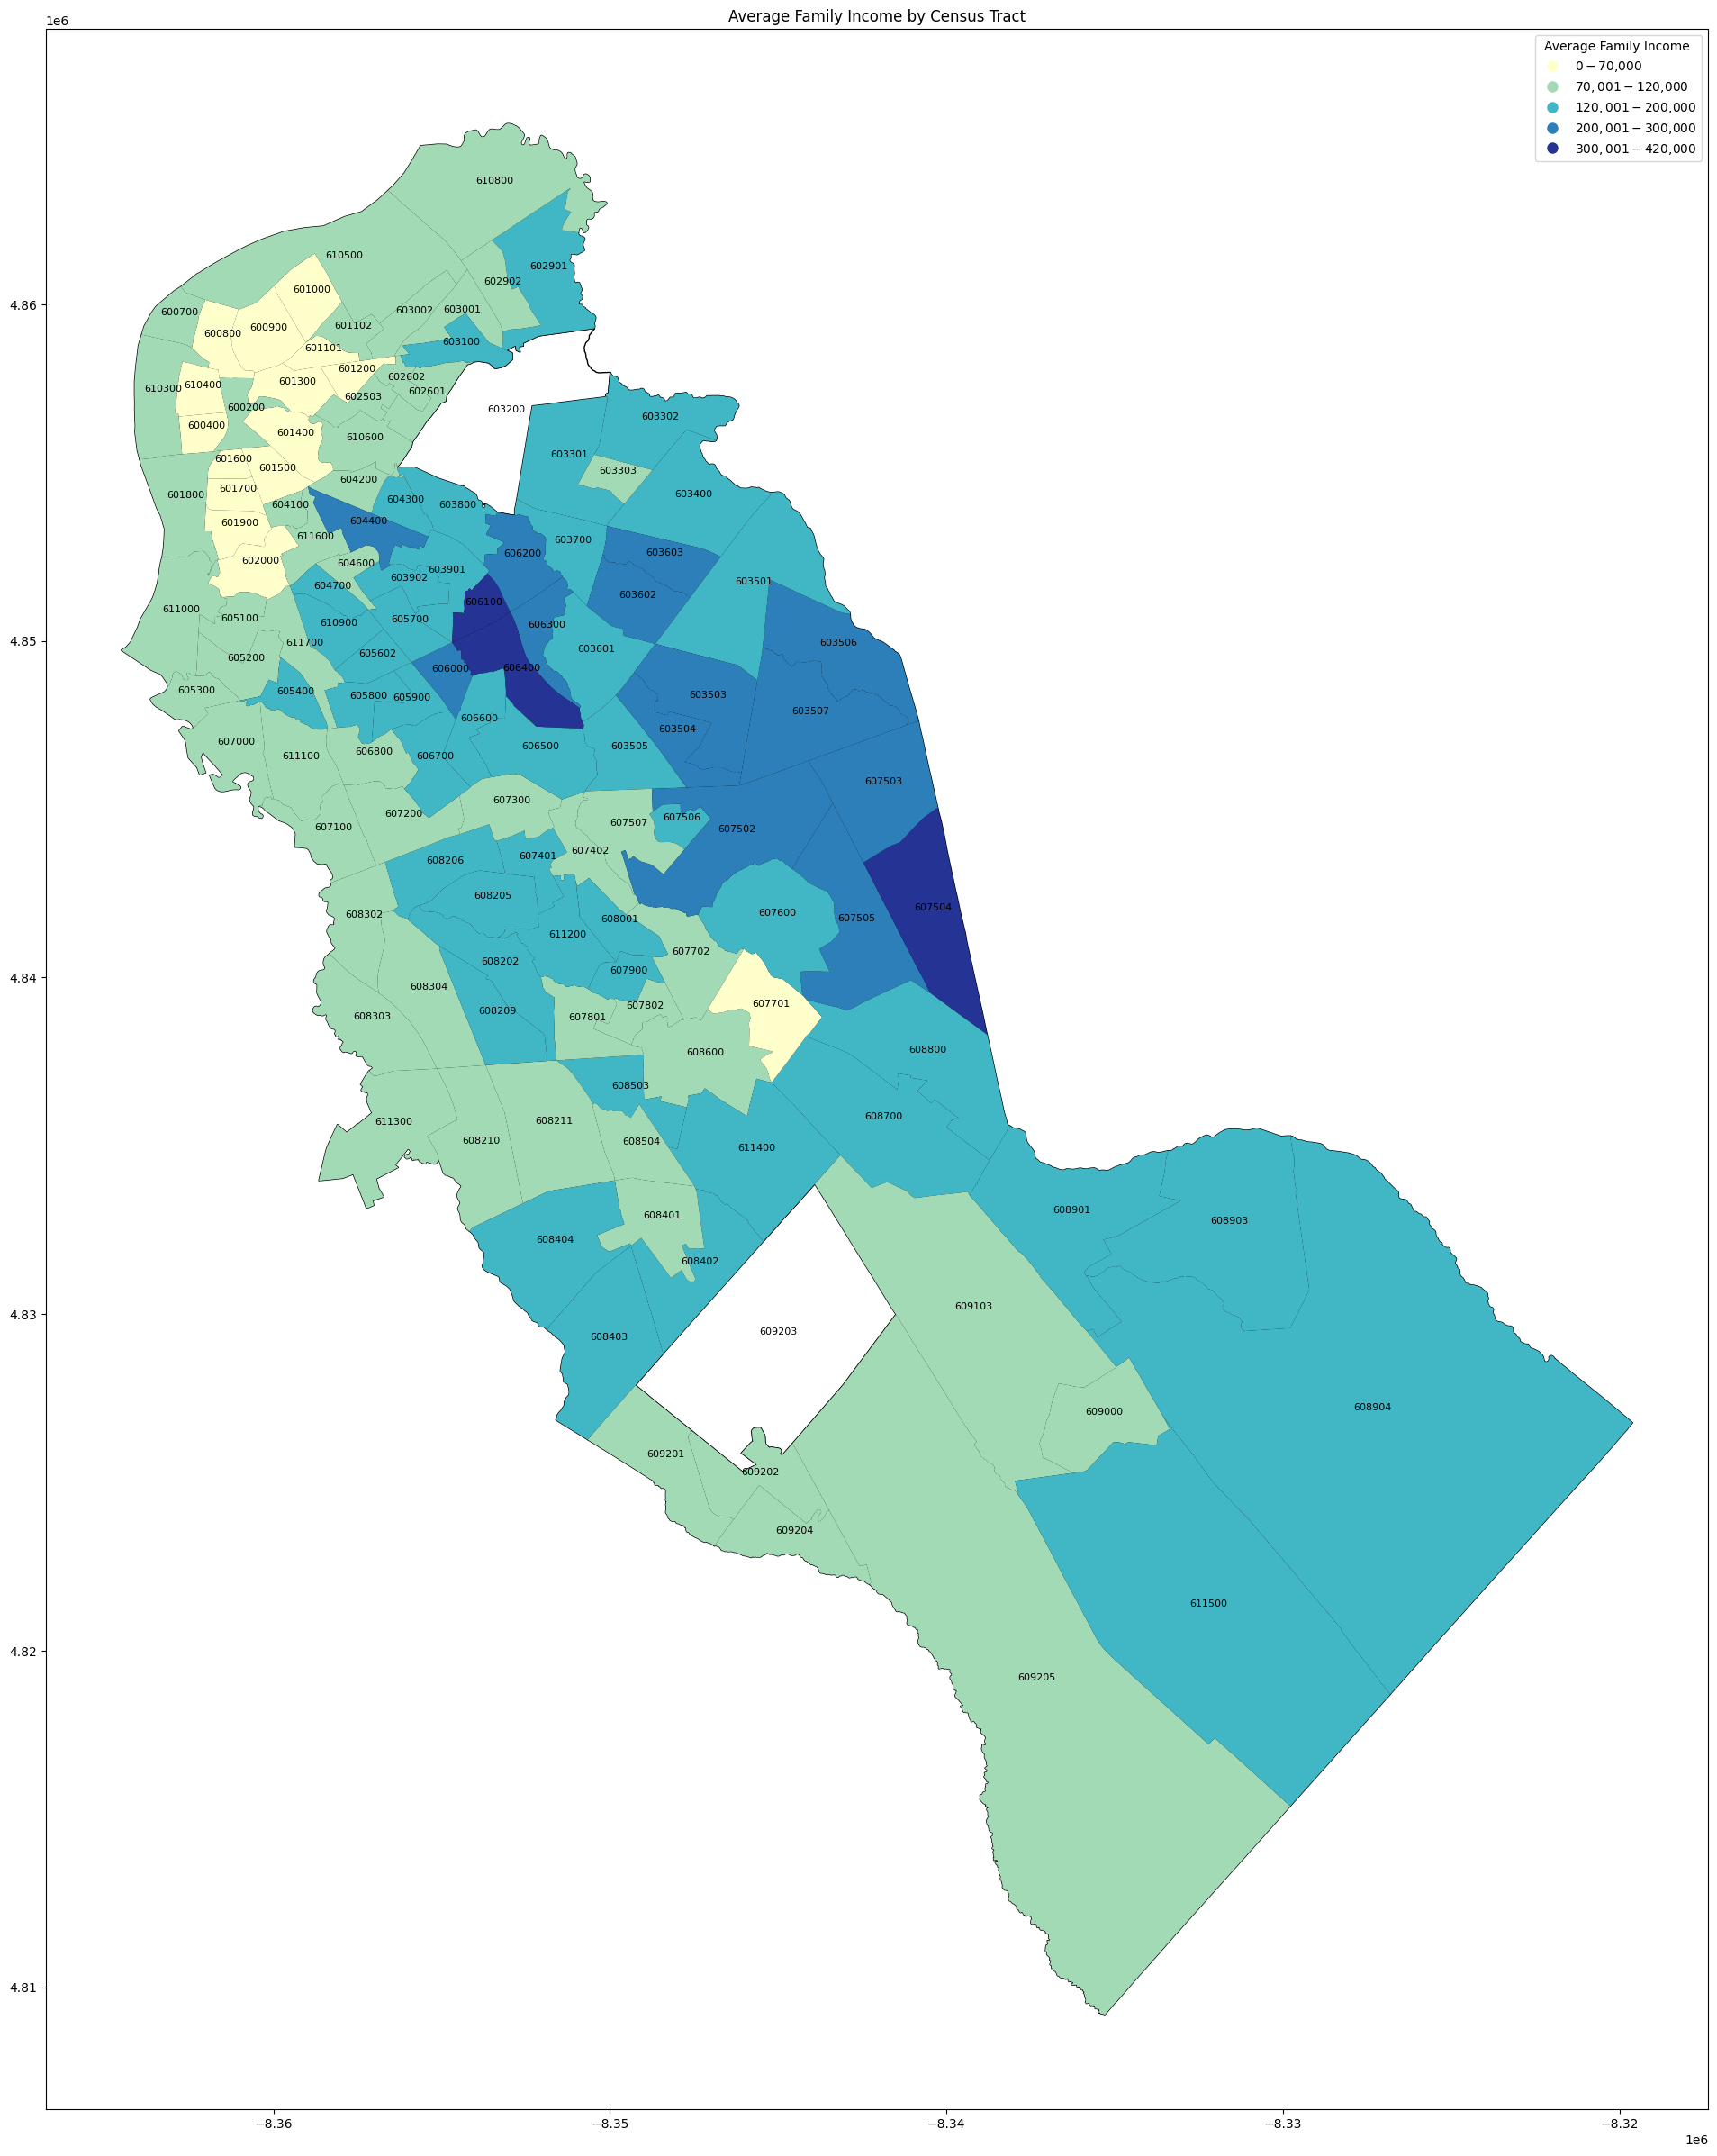

In [40]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

# Define income bins, labels, and colors
income_bins = [0, 70000, 120000, 200000, 300000, 420000]
income_labels = [
    '$0 - $70,000', '$70,001 - $120,000', '$120,001 - $200,000',
    '$200,001 - $300,000', '$300,001 - $420,000' # Added a label to match the number of bins
]
# Extend color palette to match the number of bins
colors = ['#ffffcc', '#a1dab4', '#41b6c4', '#2c7fb8', '#253494']

# Create a new column 'income_category' based on income bins and labels
merged_data['income_category'] = pd.cut(merged_data['Avg_Fam_Inc'], bins=income_bins, labels=income_labels)

# Set up custom color map and normalization
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(income_bins, cmap.N)

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(40, 30))
# Plot the base layer with white background and black borders
wd_map.plot(ax=ax, color='white', edgecolor='black')

# Plot the income categories on the map
merged_data.plot(ax=ax, column='income_category', cmap=cmap, legend=True,
                 legend_kwds={'title': 'Average Family Income '})

# Add tract IDs to the map as text labels
for idx, row in merged_data.iterrows():
    # Get the centroid of each geometry
    centroid = row['geometry'].centroid
    # Annotate with tract ID at the centroid location
    ax.annotate(
        text=row['Geo_TRACT'],  # Replace 'tract_id' with the actual column name for tract IDs
        xy=(centroid.x, centroid.y),
        xytext=(3, 3),  # Offset the text slightly for better readability
        textcoords="offset points",
        fontsize=8,
        ha='center'
    )

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
    for color, label in zip(colors, income_labels)
]
# Display custom legend
ax.legend(handles=handles, title='Average Family Income ')
# Set the title
plt.title('Average Family Income by Census Tract')
plt.show();



**Interpretation of Key Findings ** **



Income Disparities Across the County:
The map shows a clear geographic disparity in family income levels



*   Within Camden County. Darker blue areas, indicating higher income levels, are concentrated in certain census tracts, while lighter areas represent lower-income neighborhoods.




*  Higher-Income Areas: Tracts with darker shades, mostly located on the eastern side of the map, have average family incomes in the range of $200,001  to    $420,000. These areas likely have better access to resources such as quality schools, healthcare, and housing, contributing to a higher quality of life.
Lower-Income Areas: The lighter-colored tracts, primarily in the



*  Northern and central sections, show lower average family incomes, typically under $120,000. These areas may face more economic challenges, such as reduced access to quality education, healthcare, and other resources that impact residents' well-being.



**DEMOGRAPHICS: HOUSEHOLDS WITH INCOME ASSISTANCE,EDU ATTAINMENT AND EMPLOYMENT OVER 16 YEARS AND ABOVE **

Side by side map classsification of household with income assistance, education attainmnet and Employment Over 16 Years and Above

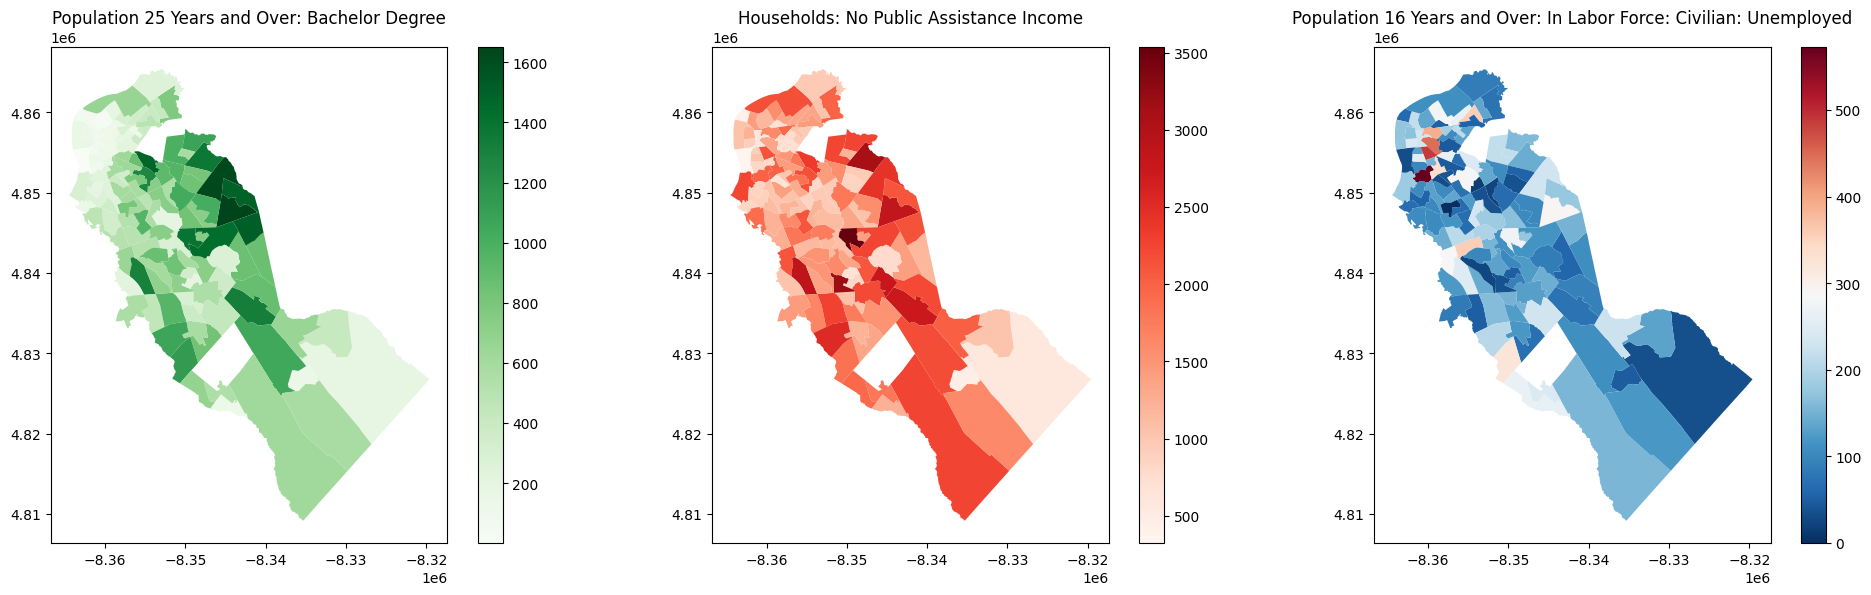

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

#"BuGn""YlGn""winter""spring""PRGn""RdBu"

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Educational Attainment
merged_data.plot(column='Bachelors_25Plus', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Population 25 Years and Over: Bachelor Degree')

# Map 2: Household with Income Assistance
merged_data.plot(column='Housholds_No_Public_Assist', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Households: No Public Assistance Income')

# Map 3: Employment Over 16 Years and Above
merged_data.plot(column='Unemployed_16Plus', cmap='RdBu_r', legend=True, ax=axes[2])
axes[2].set_title('Population 16 Years and Over: In Labor Force: Civilian: Unemployed')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

**Education, Employment, and Income Assistance**

These three variables provide a multi-faceted view of quality of life in Camden, linking economic conditions with healthcare access and focusing on a highly vulnerable age group +Average Family Income (In 2022 Inflation Adjusted Dollars
+Total: No Health Insurance Coverage
+Population 65 or Older: No Health Insurance Coverage

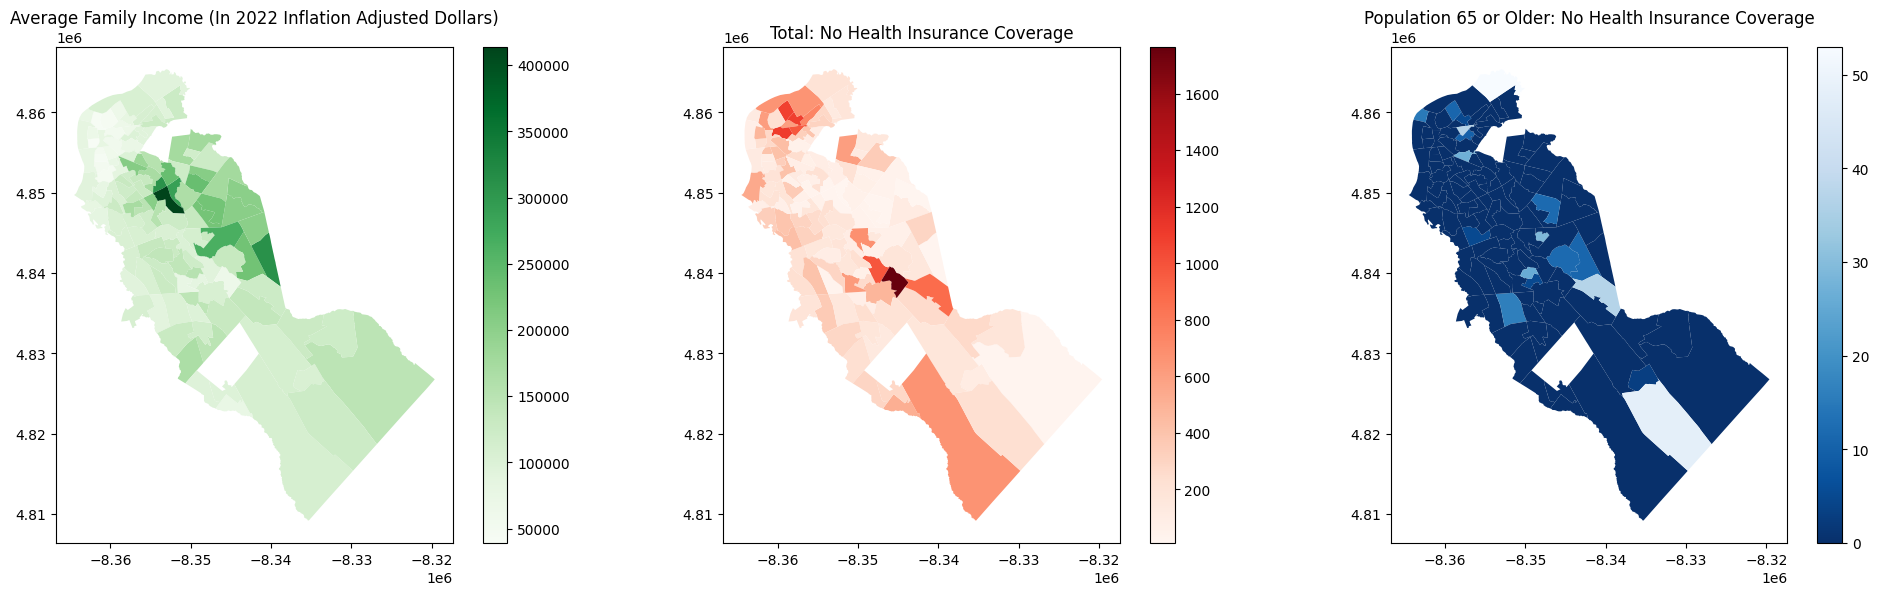

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Average Family Income (In 2022 Inflation Adjusted Dollars
merged_data.plot(column='Avg_Fam_Inc', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Average Family Income (In 2022 Inflation Adjusted Dollars)')

# Map 2: Total: No Health Insurance Coverage
merged_data.plot(column='Total_No_Health_Ins', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Total: No Health Insurance Coverage')

# Map 3: Population 65 or Older: No Health Insurance Coverage
merged_data.plot(column='Pop_65Plus_No_Health_Ins', cmap='Blues_r', legend=True, ax=axes[2])
axes[2].set_title('Population 65 or Older: No Health Insurance Coverage')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();

THREE SIDED MAP

+Avg_Fam_Income_2022 (Economic stability),
+Total_No_Health_Ins (Healthcare access),
+Households_Public_Assist (Economic vulnerability).


These visualizations would reveal Camden neighborhoods where quality of life is likely lower, helping to identify areas that may benefit from targeted interventions or support.

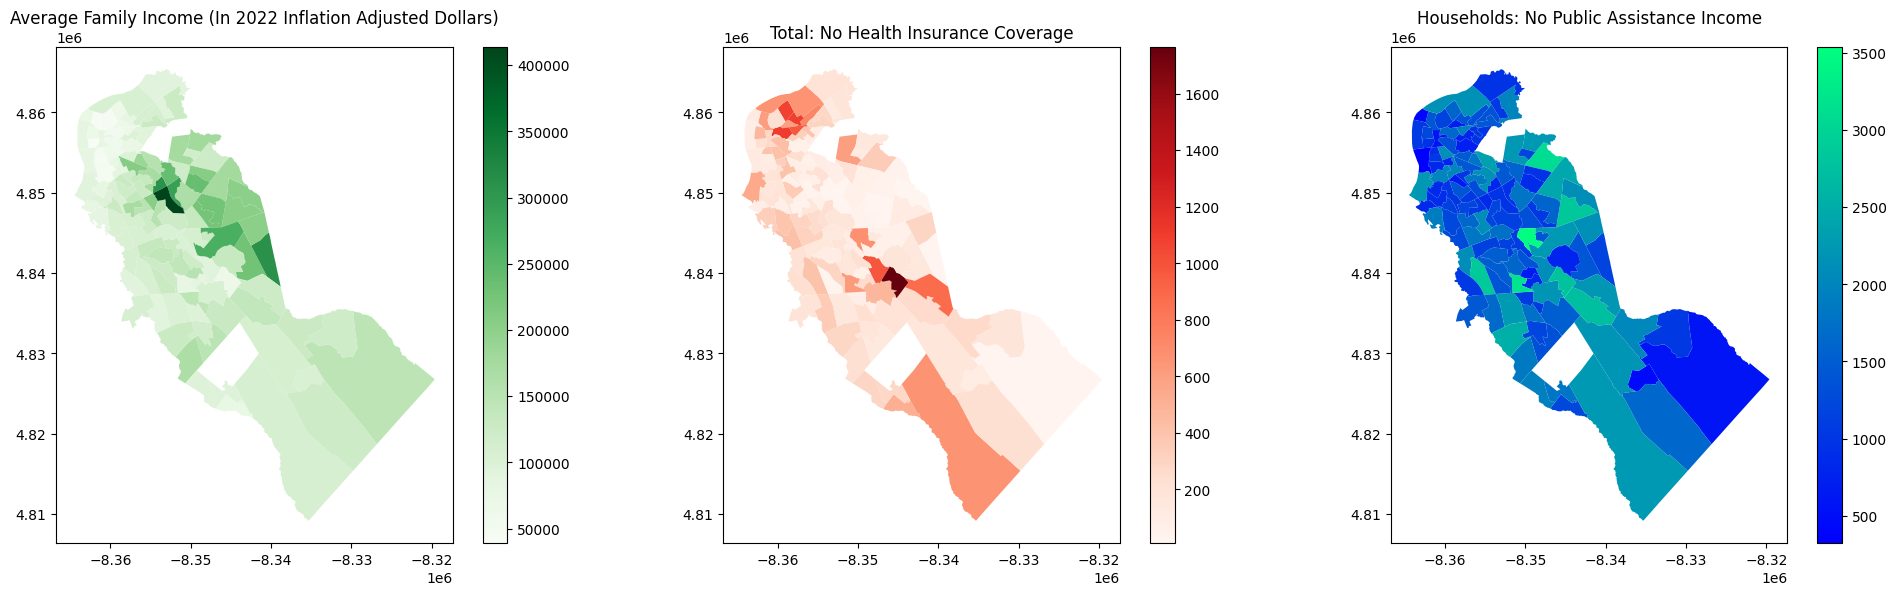

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt


# 2. Create Three Side-by-Side Maps

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Map 1: Average Family Income (In 2022 Inflation Adjusted Dollars
merged_data.plot(column='Avg_Fam_Inc', cmap='Greens', legend=True, ax=axes[0])
axes[0].set_title('Average Family Income (In 2022 Inflation Adjusted Dollars)')

# Map 2: Total: No Health Insurance Coverage
merged_data.plot(column='Total_No_Health_Ins', cmap='Reds', legend=True, ax=axes[1])
axes[1].set_title('Total: No Health Insurance Coverage')

# Map 3: Population 65 or Older: No Health Insurance Coverage
merged_data.plot(column='Housholds_No_Public_Assist', cmap='winter', legend=True, ax=axes[2])
axes[2].set_title('Households: No Public Assistance Income')

plt.tight_layout()  # Adjust spacing between subplots
plt.show();




**Economic Disparities and Quality of Life:**



•	Reliance on Public Assistance: In areas with a high reliance on public assistance, economic vulnerability is evident. Households dependent on public assistance are typically associated with lower income, job insecurity, and a higher risk of poverty contributing to reduced quality of life




•	Income Inequality:


There is a noticeable disparity in average family income across Camden County, with some areas showing significantly lower income levels.


**Healthcare Access Challenges**


•	High Uninsurance Rates:

 Certain neighborhoods show a high number of individuals without health insurance. Lack of insurance is a significant barrier to healthcare access, often resulting in delayed care, untreated health conditions, and a reliance on emergency services for medical needs



•	Elderly Population Without Insurance:

 The concentration of uninsured elderly individuals in some areas highlights a critical healthcare gap.


**Correlation Between Economic and Healthcare Vulnerability**


•	Economic and Healthcare Overlap:

There is a correlation between lower-income areas, high uninsurance rates, and reliance on public assistance, suggesting that economic and healthcare vulnerabilities are interconnected.



•	Residents in economically disadvantaged neighborhoods not only struggle with financial stability but also face significant barriers to accessing healthcare. This combination exacerbates quality-of-life challenges, leading to poorer health outcomes and increased stress.


LOOKING AT THE TRENDS IN EDUCATION, EMPLOYMENT AND INCOME ASSISTANCE



**Population Distribution in Camden County: Employment Status and Health Insurance Coverage Patterns**

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population by Education public Assistance and Health coverage (1 Dot = 100 People)')

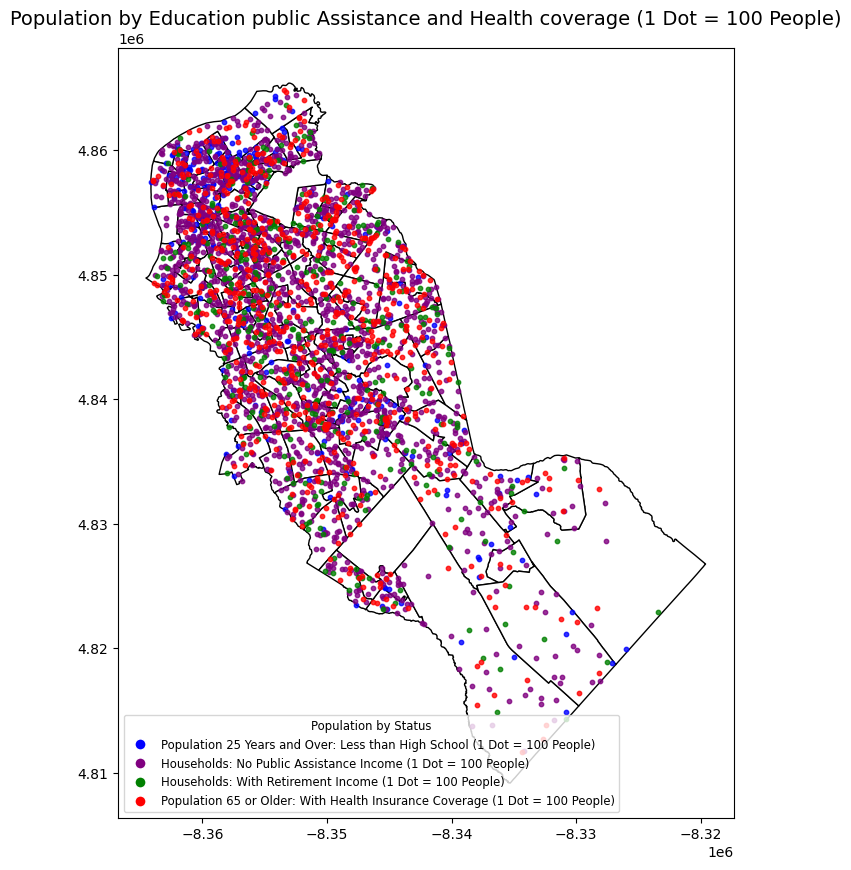

In [44]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Less than High School': 'blue',
    'Households: No Public Assistance Income': 'purple',
    'Households: With Retirement Income': 'green',
    'Population 65 or Older: With Health Insurance Coverage': 'red',
}
people_status_columns = {
    'Population 25 Years and Over: Less than High School': 'Less_HS_25Plus', # Fixed: Added ': Employed' to the key to match people_status_colors
    'Households: No Public Assistance Income': 'Housholds_No_Public_Assist',
    'Households: With Retirement Income': 'Housholds_Retire_Inc',
    'Population 65 or Older: With Health Insurance Coverage': 'Pop_65Plus_With_Health_Ins'
}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Education public Assistance and Health coverage (1 Dot = 100 People)', fontsize=14)
plt.show()

**BREAKING THE DENSITY MAP INTO SMALLER BITS TO CAPTURE MORE DEPTHS IN THE TRENDS**

**NEXT: MAKING DENSITY MAPS WITH ONE OR TWO VARIABLES**


**Population by Age and Public assistance **

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population by Age & Education with  Public Assistance   (1 Dot = 100 People)')

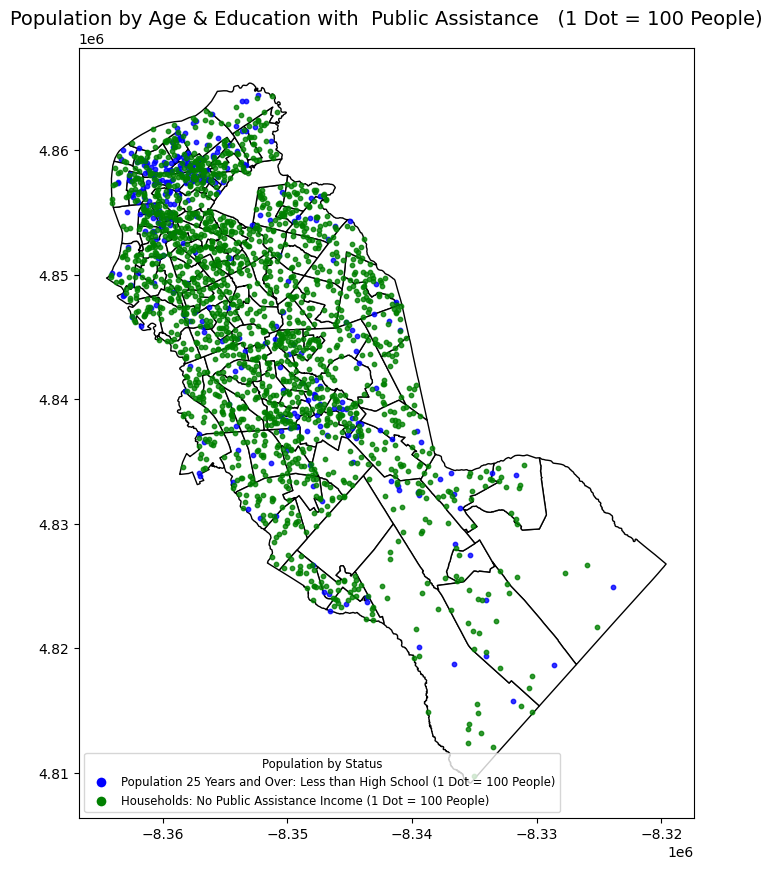

In [45]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Less than High School': 'blue',
    'Households: No Public Assistance Income': 'green',


}
people_status_columns = {
    'Population 25 Years and Over: Less than High School': 'Less_HS_25Plus', # Fixed: Added ': Employed' to the key to match people_status_colors
    'Households: No Public Assistance Income': 'Housholds_No_Public_Assist',


}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Age & Education with  Public Assistance   (1 Dot = 100 People)', fontsize=14)
plt.show()


**FINDINGS**


Green Dots: Households with no public assistance income.
Blue Dots:    Population aged 25 years and over with less than a high school education.

**1. Geographic Distribution of Households Without Public Assistance (Green Dots)**


**•	High Concentration Areas:**


Green dots are widely distributed across the county but show higher density in suburban regions to the northwest and southern sections of the county.These areas likely represent more affluent or middle-class neighborhoods where households are economically stable and less reliant on public assistance.


**•	Low Concentration Areas:**


Urban areas, particularly around central and northern Camden City, show fewer green dots, indicating that many households in these regions may rely on public assistance due to economic challenges.

**•	Insight:**


The distribution of green dots suggests significant economic disparities between suburban and urban neighborhoods in Camden County.

**2. Geographic Distribution of Adults with Less than a High School Education (Blue Dots)**


**•	High Concentration Areas:**


Blue dots cluster in urban areas, particularly Camden City, which are known for their socioeconomic challenges. These areas often experience higher poverty rates and limited access to quality education.Specific neighborhoods in North Camden and South Camden show the densest clustering of blue dots.


**•	Low Concentration Areas:**


Suburban and outlying areas have fewer blue dots, reflecting higher educational attainment in these regions.


**•	Insight:**

The clustering of blue dots in urban neighborhoods underscores educational inequalities, which are often linked to systemic underinvestment in schools and community resources.



**3.Overlap Between Education and Public Assistance**

•**	Spatial Relationship:**

Areas with higher concentrations of blue dots (low educational attainment) also tend to have fewer green dots (households not relying on public assistance).This correlation suggests that low educational attainment may contribute to economic instability, increasing reliance on public assistance in urban neighborhoods.


**•	Implication:**

 Addressing educational disparities in Camden City could play a key role in improving economic independence and reducing reliance on public assistance.


**4.Neighborhood-Specific Observations**

**•	Northern Camden City:**

Clusters of blue dots dominate, indicating widespread low educational attainment.Few green dots suggest significant reliance on public assistance in this area, aligning with its status as a region facing economic challenges.

**•	Southern and Suburban Areas:**


A higher density of green dots reflects more households without public assistance.Sparse blue dots in these areas indicate better educational outcomes and economic stability.





Population by Education and public Assistance 2

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population by Age & Education with  Public Assistance  (1 Dot = 100 People)')

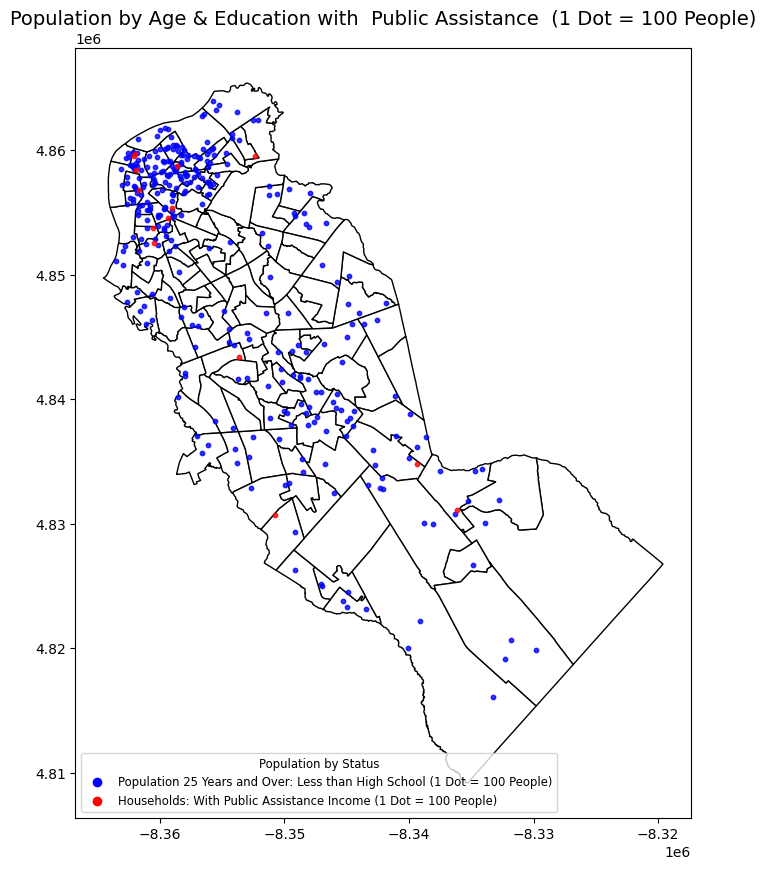

In [46]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Less than High School': 'blue',
    'Households: With Public Assistance Income': 'red',


}
people_status_columns = {
    'Population 25 Years and Over: Less than High School': 'Less_HS_25Plus', # Fixed: Added ': Employed' to the key to match people_status_colors
    'Households: With Public Assistance Income': 'Housholds_Public_AssistInc',


}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Age & Education with  Public Assistance  (1 Dot = 100 People)', fontsize=14)
plt.show()

**FINDINGS**



This dot density map represents two socioeconomic variables in Camden County:

•**	Blue Dots:** Population aged 25 years and over with less than a high school education.

**•	Red Dots:** Households with public assistance income.

**1. Geographic Distribution of Low Educational Attainment (Blue Dots)**

**•	High Concentration Areas:**



Blue dots cluster in the northern and central parts of Camden County, particularly in urban areas like Camden City.
These areas are characterized by systemic barriers to education, such as underfunded schools and limited access to educational opportunities.



**•	Low Concentration Areas:**


Suburban and southern parts of Camden County, such as Cherry Hill and Voorhees, show fewer blue dots, indicating higher educational attainment in these regions.


**•	Insight:**

Urban areas face significant educational challenges compared to suburban areas, creating a divide in educational outcomes.



**2. Geographic Distribution of Households with Public Assistance Income (Red Dots)**


**•	High Concentration Areas:**


Red dots are heavily concentrated in Camden City, particularly in neighborhoods such as North Camden, Fairview, and Waterfront South.These neighborhoods are known for higher poverty rates and limited economic opportunities, which likely contribute to greater reliance on public assistance.


**•	Low Concentration Areas:**


Suburban areas to the south and east of Camden County show sparse red dots, indicating less reliance on public assistance. These regions typically have more stable economic conditions.


**•	Insight:**

Public assistance income is most common in economically disadvantaged areas, particularly urban neighborhoods.


**3. Correlation Between Education and Public Assistance**


**•	Overlap Between Variables:**


Areas with high concentrations of blue dots (low educational attainment) also show clusters of red dots (households on public assistance), particularly in Camden City.This suggests a strong correlation between low educational attainment and economic dependency, as limited education often restricts access to higher-paying jobs and financial independence.


**•	Geographic Patterns:**

Suburban areas with higher educational attainment (fewer blue dots) have correspondingly fewer households relying on public assistance (red dots).


**Neighborhood-Specific Observations**


**Urban Areas (e.g,Camden City): **


This urban area shows the densest clustering of blue and red dots, reflecting both low educational attainment and high reliance on public assistance. These neighborhoods face compounded socioeconomic challenges.Policy interventions targeting education and economic development are critical for these regions.



**•	Suburban Areas (e.g., Cherry Hill, Haddonfield):**

These areas have fewer blue and red dots, indicating better educational outcomes and greater economic stability.
Maintaining these trends requires continued investment in education and economic opportunities.


**Insight:**


The map reveals a clear divide in Camden County, with urban neighborhoods like Camden City experiencing high levels of educational and economic vulnerability. Suburban areas are comparatively stable, with fewer households relying on public assistance and better educational outcomes. Bridging this divide will require targeted interventions in education and economic opportunities to improve quality of life in disadvantaged areas.






Population by Age and Health coverage (1 Dot = 100 People)

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Population by Age and Health coverage (1 Dot = 100 People)')

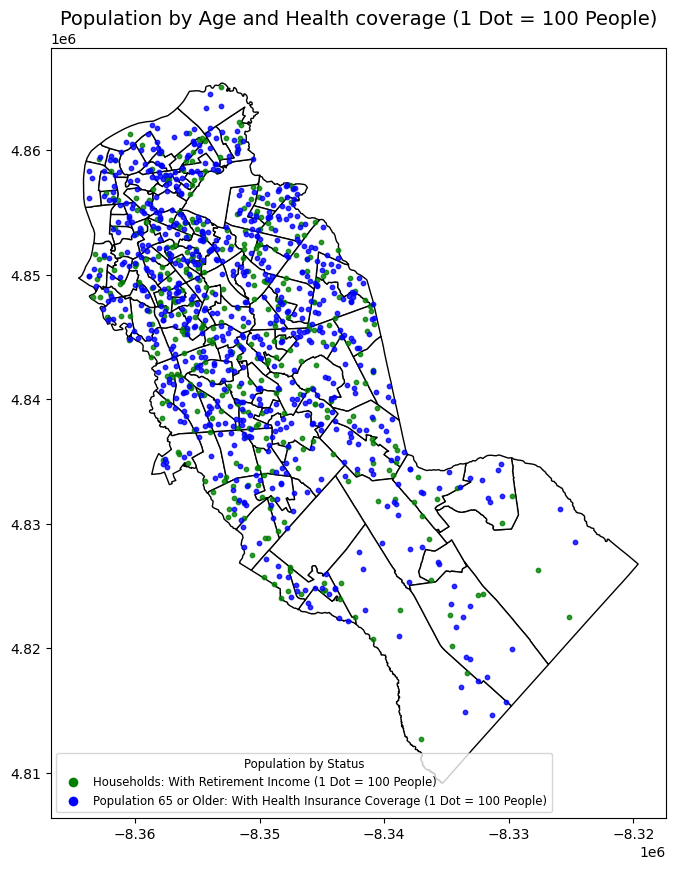

In [47]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {


    'Households: With Retirement Income': 'green',
    'Population 65 or Older: With Health Insurance Coverage': 'blue',
}
people_status_columns = {


    'Households: With Retirement Income': 'Housholds_Retire_Inc', #Fixed: Added ': Employed' to the key to match people_status_colors
    'Population 65 or Older: With Health Insurance Coverage': 'Pop_65Plus_With_Health_Ins'
}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Age and Health coverage (1 Dot = 100 People)', fontsize=14)
plt.show()

**FINDINGS**



•	Green Dots: Households with retirement income.
•	Blue Dots: Population aged 65 years or older with health insurance coverage.

**Key Observations**

1.	**Distribution of Households with Retirement Income (Green Dots)**:

**High Concentration Areas:**

Green dots are more concentrated in suburban and southern parts of Camden County, such as Cherry Hill, Voorhees, and Haddonfield. These regions typically consist of middle to upper-middle-class households with financial stability and savings.

**Low Concentration Areas:**


Urban areas, particularly Camden City, show fewer green dots, indicating fewer households with retirement income. This reflects lower economic stability and retirement savings in these areas.

**Insight:**

Households with retirement income are predominantly located in economically stable suburban regions.



2**.	Distribution of Population 65 or Older with Health Insurance (Blue Dots):**


**High Concentration Areas:**

Blue dots are widely distributed across the county but are notably dense in both suburban and urban areas. Even in Camden City, there is a notable presence of insured older adults.


**Low Concentration Areas:**

Few sparsely populated rural areas in the southernmost parts of the county show lower blue dot density.

**Insight: **

Health insurance coverage for older adults appears widespread, possibly due to programs like Medicare, which ensure coverage regardless of geographic or economic conditions.


**Key Themes**

1.**	Economic Stability and Retirement Income:**


Suburban areas show a higher density of green dots, indicating a better capacity for retirement savings and economic security.
Urban areas, with fewer green dots, highlight the economic challenges that reduce opportunities for retirement income accumulation.


2.	**Health Insurance Coverage in Older Adults:**


Blue dots are broadly distributed, indicating that most adults aged 65 and older have health insurance coverage, thanks to federal programs like Medicare. This provides a level of health security across diverse areas of Camden County.





Population by Age and  Without Health coverage (1 Dot = 100 People)

<Axes: >

<Axes: >

<ipython-input-48-9ffb9db4916a>:45: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8


<Axes: >

Text(0.5, 1.0, 'Population by Age and No  Health coverage (1 Dot = 100 People)')

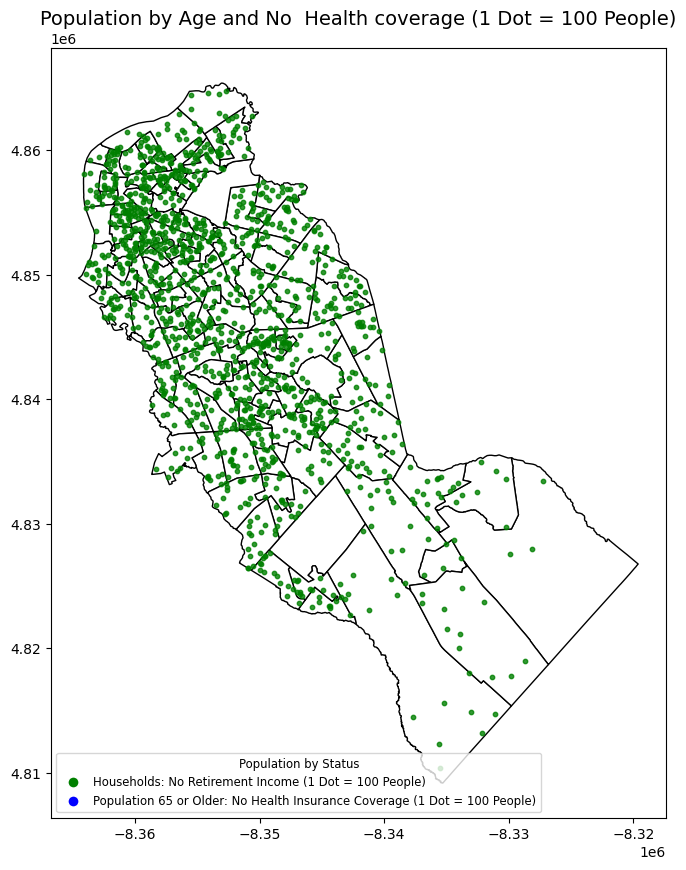

In [48]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {


    'Households: No Retirement Income': 'green',
    'Population 65 or Older: No Health Insurance Coverage': 'blue',
}
people_status_columns = {


    'Households: No Retirement Income': 'Housholds_No_Retir_Inc', #Fixed: Added ': Employed' to the key to match people_status_colors
    'Population 65 or Older: No Health Insurance Coverage': 'Pop_65Plus_No_Health_Ins'
}
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')
# Set plot title
plt.title('Population by Age and No  Health coverage (1 Dot = 100 People)', fontsize=14)
plt.show()

**FINDINGS**


Green Dots: Households with no retirement income.
Blue Dots: Population aged 65 or older without health insurance coverage.


1. Distribution of Households Without Retirement Income (Green Dots):


**•	High Concentration Areas:**


Green dots are densely distributed across urban and suburban regions, particularly in Camden City and the surrounding areas.
This suggests a widespread lack of retirement income across various neighborhoods, potentially reflecting economic challenges such as insufficient savings or low-income job histories.


**•	Low Concentration Areas:**

Sparse green dots are visible in some southern and more affluent suburban areas, such as parts of Cherry Hill and Haddonfield.
These regions likely have higher-income households with better financial planning for retirement.



Insight: The lack of retirement income is prevalent across the county but is more concentrated in urban areas, reflecting economic disparities.



**Distribution of Older Adults Without Health Insurance (Blue Dots):**

•**	High Concentration Areas:**


Blue dots, while less frequent than green dots, are spread sporadically across the county, with some clustering in urban and economically disadvantaged neighborhoods.
These uninsured individuals aged 65 or older are likely facing barriers to healthcare access, despite the availability of Medicare.


**•	Low Concentration Areas:**


Suburban and southern regions show very few blue dots, indicating that older adults in these areas are more likely to have health insurance coverage.

•	Insight: Although Medicare is widespread, there are pockets of older adults without insurance, especially in urban areas with financial challenges.


**Overlap of Green and Blue Dots:**


•	Areas with a higher concentration of green dots (households without retirement income) also tend to show some clustering of blue dots (uninsured older adults). This suggests a correlation between economic instability and healthcare access challenges for older populations.


Population 16 Years and Over: In Labor Force: Civilian: Employed, with health Insurance Coverage

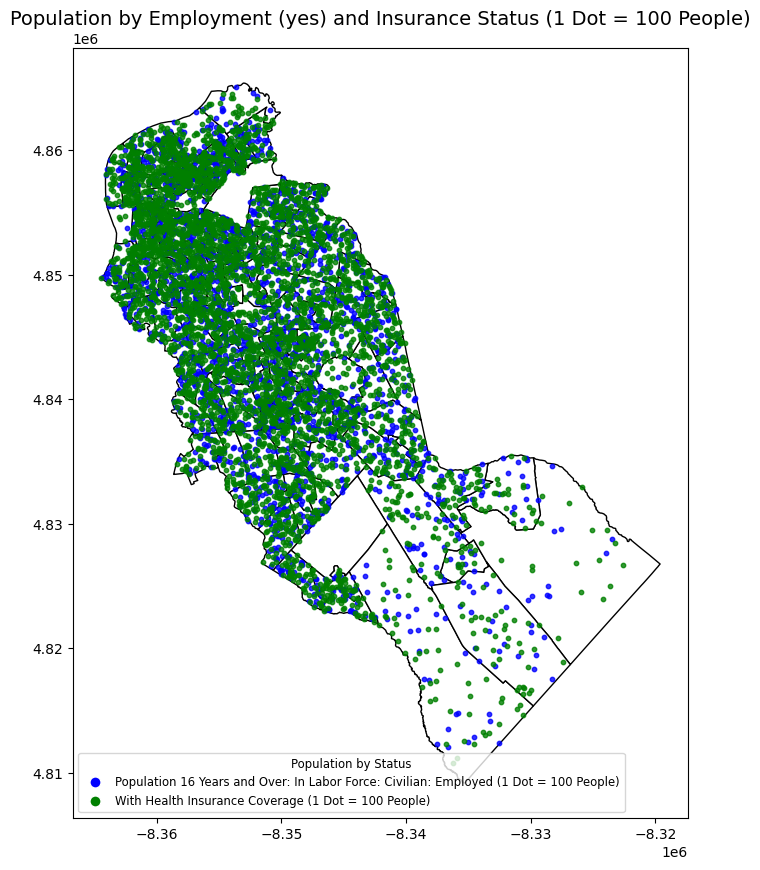

In [49]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {
    'Population 16 Years and Over: In Labor Force: Civilian: Employed': 'blue',

    'With Health Insurance Coverage': 'green',

}
people_status_columns = {
    'Population 16 Years and Over: In Labor Force: Civilian: Employed': 'Employed_16Plus',

    'With Health Insurance Coverage': 'Total_With_Health_Ins',

}

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Population by Employment (yes) and Insurance Status (1 Dot = 100 People)', fontsize=14)
plt.show();


FINDINGS


**Key Observations**

**Distribution of Employed Population (Green Dots):**


•	High Concentration Areas:

Green dots are widely distributed across both urban and suburban regions, indicating a significant presence of employed individuals throughout Camden County.

Suburban areas, such as Cherry Hill, Voorhees, and Haddonfield, show particularly high concentrations of employed populations. These regions are known for economic stability and access to job opportunities.


•	Low Concentration Areas:

While urban areas like Camden City also have many green dots, they appear less dense compared to the suburban regions. This could reflect the availability of jobs in suburban areas relative to the urban core.
Insight: Employment is widespread in Camden County, but suburban regions have a slightly higher density of employed individuals, suggesting better job opportunities in these areas.



Distribution of Health Insurance Coverage (Blue Dots):


•	High Concentration Areas:

Blue dots are spread across the county, particularly in suburban regions, where employment often includes employer-provided health insurance. This suggests a correlation between employment and health insurance access.


•	Low Concentration Areas:

Urban areas such as Camden City show fewer blue dots relative to green dots, indicating gaps in health insurance coverage. This could be due to lower-paying or part-time jobs that do not offer insurance benefits, or populations relying on public insurance.


Insight: Health insurance coverage is closely tied to employment but is less consistent in urban areas, where economic challenges may limit access to employer-based coverage.




**Correlation Between Employment and Health Insurance**



•	Overlap of Green and Blue Dots:


In suburban areas, there is significant overlap between green and blue dots, reflecting a strong connection between employment and health insurance coverage.

Urban areas, particularly Camden City, show a weaker overlap, indicating that employment does not always guarantee health insurance coverage in these neighborhoods.

Implication: The map highlights disparities in access to health insurance, even among the employed population, with urban areas facing greater challenges.




**Neighborhood-Specific Observations**

•	Urban Areas (Camden City):


Camden City shows a visible presence of employed individuals (green dots), but the relative scarcity of blue dots suggests that many employed residents lack health insurance, possibly relying on public health programs or remaining uninsured.


•	Suburban Areas (Cherry Hill, Haddonfield):


These regions show a strong alignment between green and blue dots, indicating that most employed individuals have health insurance. This reflects better access to stable jobs with benefits.



Population by Employment and Insurance  Status

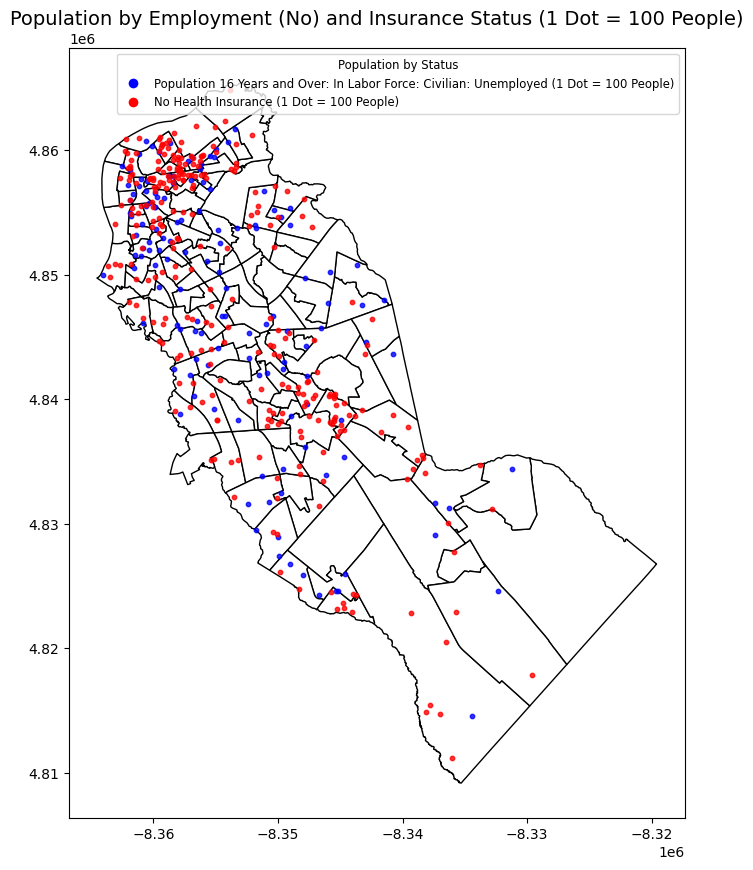

In [50]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {

    'Population 16 Years and Over: In Labor Force: Civilian: Unemployed': 'blue',

    'No Health Insurance': 'red',
}
people_status_columns = {

    'Population 16 Years and Over: In Labor Force: Civilian: Unemployed': 'Unemployed_16Plus',

    'No Health Insurance': 'Total_No_Health_Ins'
}

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Population by Employment (No) and Insurance Status (1 Dot = 100 People)', fontsize=14)
plt.show();


POPULATION WITH PUBLIC ASSISTANCE


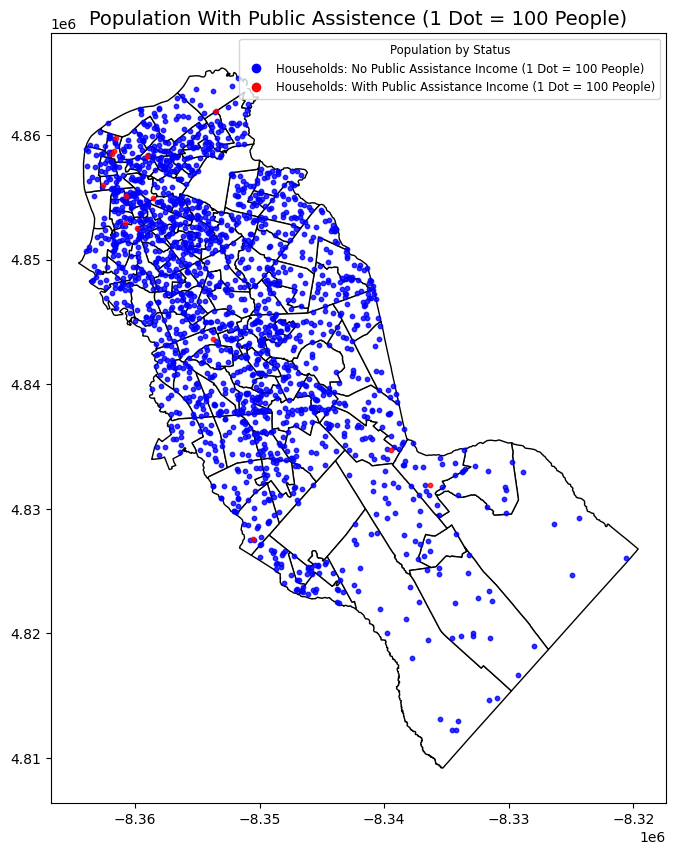

In [51]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point
import pandas as pd

# Define your data mappings
people_status_colors = {

    'Households: No Public Assistance Income': 'blue',

    'Households: With Public Assistance Income': 'red',
}
people_status_columns = {

    'Households: No Public Assistance Income': 'Housholds_No_Public_Assist',

    'Households: With Public Assistance Income': 'Housholds_Public_AssistInc'
}

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)  # Increased markersize to 10, alpha to 0.8

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Population With Public Assistence (1 Dot = 100 People)', fontsize=14)
plt.show();


**OVERALL OBSERVATION**

**Key Takeaways from the Public Assistance Map**

High Concentration of Households Without Public Assistance (Blue Dots):
The map shows a dominant presence of blue dots, indicating that the majority of households in Camden County do not rely on public assistance.

These dots are evenly distributed throughout suburban and rural areas, reflecting stronger economic stability in these regions compared to urban centers.

** Clusters of Public Assistance Dependency (Red Dots):**


Red dots, representing households with public assistance, are concentrated in the northern areas of the county, particularly in Camden City and its immediate surroundings. This pattern highlights economic vulnerability and reliance on government support in urban neighborhoods.

**EDUCATIONAL ATTAINMENT DENSITY MAP**

+Bachelors_25Plus:Population 25 Years and Over: Bachelors Degree

+Less_HS_25Plus: Population 25 Years and Over without High School

+Population 25 Years and Over: Some College

<Axes: >

<Axes: >

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Employment, Education, Retirement Income, and Elderly Health Coverage in Camden County (1 Dot = 100 People)')

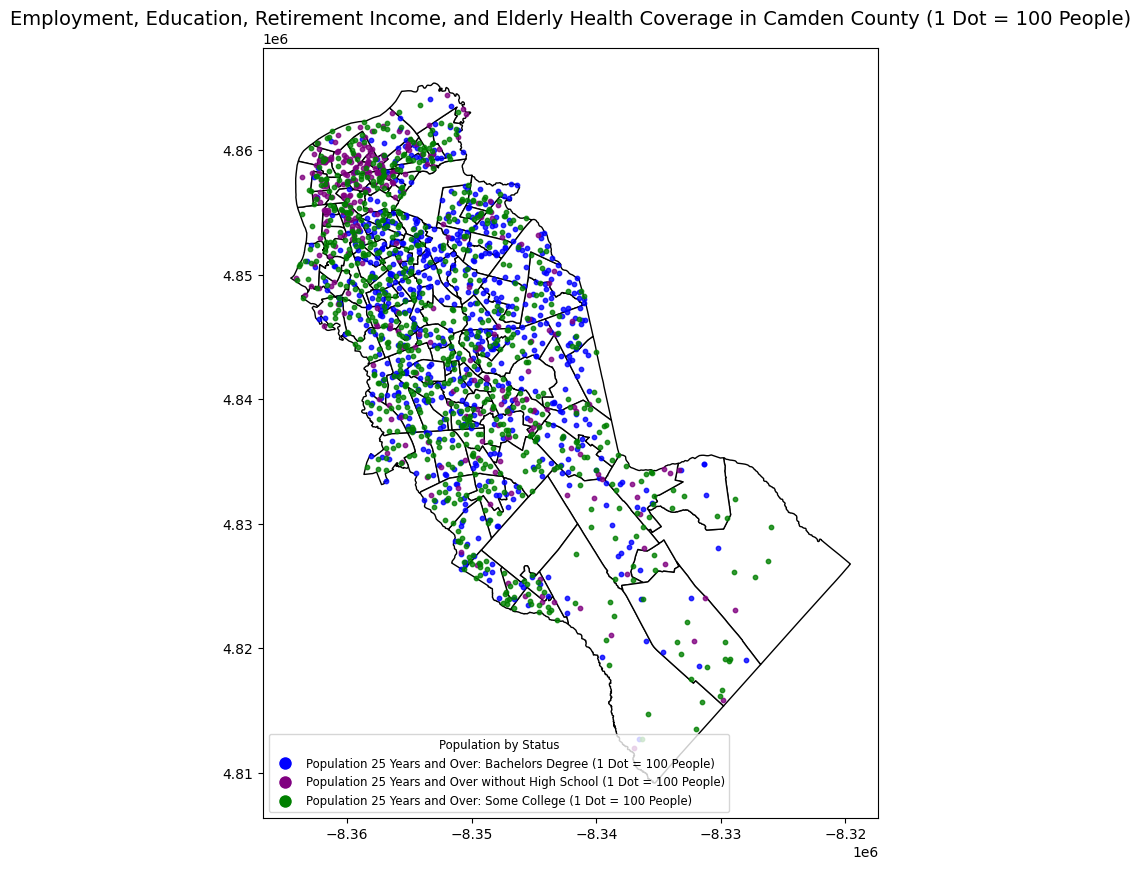

In [52]:
import matplotlib.pyplot as plt
import geopandas as gpd
import random
from shapely.geometry import Point

# Define your data mappings
people_status_colors = {
    'Population 25 Years and Over: Bachelors Degree': 'blue',
    'Population 25 Years and Over without High School': 'purple',
    'Population 25 Years and Over: Some College': 'green',

}
people_status_columns = {
    'Population 25 Years and Over: Bachelors Degree': 'Bachelors_25Plus',
    'Population 25 Years and Over without High School': 'Less_HS_25Plus',
    'Population 25 Years and Over: Some College': 'Some_College_25Plus',

}

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_data.plot(ax=ax, color='white', edgecolor='black')

# Plot points for each status type
for status, column in people_status_columns.items():
    color = people_status_colors[status]
    # Filter rows where the status column has a positive value
    subset = merged_data[merged_data[column] > 0]

    # Generate random points based on the count in each census tract for this status
    points = []
    for idx, row in subset.iterrows():
        num_points = int(row[column] / 100)  # Each point represents 100 people
        minx, miny, maxx, maxy = row['geometry'].bounds
        for _ in range(num_points):
            # Generate random points within the geometry bounds
            while True:
                random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
                if row['geometry'].contains(random_point):
                    points.append(random_point)
                    break

    # Convert list of points to a GeoSeries and plot them with increased markersize and alpha for clarity
    points_gdf = gpd.GeoSeries(points)
    points_gdf.plot(ax=ax, color=color, markersize=10, alpha=0.8, label=status)

# Customize legend with larger markers
custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f"{status} (1 Dot = 100 People)")
    for status, color in people_status_colors.items()
]
ax.legend(handles=custom_handles, title="Population by Status", fontsize='small', title_fontsize='small')

# Set plot title
plt.title('Employment, Education, Retirement Income, and Elderly Health Coverage in Camden County (1 Dot = 100 People)', fontsize=14)
plt.show()

**Overall Observation**



•	**North Camden** appears to face the greatest challenges in education, economic stability, and healthcare access for the elderly, suggesting a need for focused interventions in these areas.


•	**South Camden** has mixed needs, with some areas requiring educational and healthcare support.


•	**East Camden** generally shows higher economic stability and better healthcare access for seniors but may still benefit from targeted educational support in certain neighborhoods.


Kawachi and Berkman (2000) emphasize that economic and social inequalities drive health disparities. The geographic concentration of disadvantages in Camden City contributes to a cycle of poor health and limited socioeconomic mobility.



# DISCUSSION OF GENERAL FINDINGS

**DISCUSSION OF FINDINGS**

**Discussion on Quality of Life and Health Outcomes in Camden County**



A complex interplay of education, employment, healthcare access, and socioeconomic stability determines the quality of life and health outcomes. Camden County, New Jersey, serves as a microcosm of the challenges facing many urban and suburban areas across the United States. The divide between urban areas, such as Camden City, and the suburban regions, like Cherry Hill and Voorhees, highlights systemic inequities in access to opportunities and resources. Urban areas face disproportionately higher poverty levels, lower educational attainment, greater unemployment, and less access to healthcare, contributing to poorer health outcomes. In contrast, suburban areas enjoy better socioeconomic conditions and improved health outcomes. This discussion draws on spatial data and established research to analyze these disparities and their impact on the county’s residents.



**Urban-Suburban Divide in Educational Attainment**


The maps reveal a clear divide in educational attainment between Camden City and suburban areas such as Cherry Hill and Voorhees. Suburban regions exhibit a high density of bachelor’s degree holders, while Camden City is dominated by individuals without a high school diploma. This disparity reflects systemic inequities, such as underfunded schools, lower teacher-to-student ratios, and fewer resources available to urban students. Educational attainment is foundational for socioeconomic mobility, and its absence perpetuates cycles of poverty in Camden City.

According to Cutler and Lleras-Muney (2010), there is a link between education and health, noting that higher educational attainment leads to better health literacy, increased income, and improved access to healthcare. The lack of education in Camden City likely perpetuates cycles of poverty and poor health outcomes.



**Employment and Economic Disparities**


Employment trends across Camden County align closely with educational attainment. Suburban areas exhibit high employment rates and economic independence, supported by access to well-paying jobs, often with employer-sponsored benefits. In contrast, Camden City struggles with high unemployment and widespread reliance on public assistance programs. These patterns indicate systemic barriers to economic opportunity in urban areas, including limited job availability, underrepresentation of industries offering higher wages, and lack of workforce training programs.

These findings corroborate Marmot et al. (2008) as the authors identified unemployment as a critical driver of health inequities, noting its impact on physical and mental health. The stress associated with joblessness, coupled with reduced access to income and resources, disproportionately affects urban residents. In Camden City, unemployment exacerbates reliance on public assistance and limits upward mobility, creating a persistent cycle of economic vulnerability.


**Health Insurance and Healthcare Access**


The spatial distribution of health insurance coverage further highlights the urban-suburban divide in Camden County. Suburban residents benefit from broad access to employer-sponsored health insurance plans, ensuring regular and preventive healthcare access and improving the quality of life in such neighborhoods.

 Conversely, Camden City shows a significant uninsured population, with many residents relying on public insurance programs like Medicaid or remaining without coverage entirely. These gaps limit access to preventive care, delay treatment, and worsen chronic disease outcomes.


Braveman and Gottlieb (2014) highlighted the importance of health insurance as a determinant of health outcomes, linking lack of coverage to increased rates of untreated conditions, hospitalizations, and mortality. In Camden City, the lack of affordable insurance and access to healthcare facilities contributes to heightened health disparities.



**The Ecological Fallacy Factor**

Ecological fallacy is one of the main reasons for picking a county and studying, the findings show similarities both at the state level and neighborhood level, thus highlighting that the rule of the ecological fallacy may not hold true in this case as the finding suggests strong similarities at both counties and neighborhood level.



**Impact on Health Outcomes**



The health disparities evident in Camden County stem from the compounded effects of socioeconomic vulnerabilities. Factors such as low educational attainment, high unemployment, lack of health insurance, and persistent economic instability are interconnected drivers that culminate in poor health outcomes, particularly for urban residents in Camden City. In contrast, suburban residents, with better access to healthcare, education, and economic opportunities, experience longer life expectancies, improved physical and mental health, and reduced chronic disease burdens. This spatially defined inequity underscores the role of structural inequalities in shaping public health.



Kawachi and Berkman (2000) discuss how economic and social inequalities translate into health disparities. Their research highlights the role of neighborhood conditions in shaping access to resources and opportunities, further entrenching poor health outcomes in disadvantaged areas like Camden City.



**Chronic Diseases in Urban Areas**

Urban residents in Camden City face higher rates of chronic diseases, such as diabetes, hypertension, and cardiovascular conditions. These health challenges are compounded by:


**Limited Preventive Care:** The lack of health insurance among many Camden City residents reduces access to preventive services, such as routine screenings, critical for early detection and management of chronic diseases.



**Environmental Stressors:** Urban areas often lack green spaces and recreational facilities, limiting opportunities for physical activity and contributing to sedentary lifestyles, a key driver of chronic disease.



**Food Insecurity:** The prevalence of food deserts in urban areas forces residents to rely on unhealthy, processed foods, exacerbating obesity and related conditions.


In sum, Braveman and Gottlieb (2014) highlight how socioeconomic disadvantages, including limited access to nutritious food and safe environments, increase the risk of chronic diseases. Camden City's high concentration of low-income households correlates with these systemic barriers, further entrenching poor health outcomes.



**Mental Health Challenges**



Economic instability and unemployment in Camden City significantly impact residents' mental health. Chronic stress, anxiety, and depression are prevalent, driven by:



**Financial Insecurity**: High unemployment rates create chronic stressors, as families struggle to meet basic needs like housing, healthcare, and food.


**Community Stress:** The lack of recreational spaces and safe environments in urban areas exacerbates feelings of social isolation and community disconnection.





**Generational Trauma:**  Persistent poverty and inequity can perpetuate cycles of mental health challenges across generations, especially in communities with limited access to mental health care.

 Marmot et al. (2008) identify economic instability as a critical determinant of mental health disparities. They argue that unemployment and financial stress create chronic mental health burdens, which are exacerbated in urban areas like Camden City, where social supports are often insufficient.




**The Urban-Suburban Divide in Health Outcomes**



Suburban residents, such as those in Cherry Hill and Voorhees, benefit from several advantages that protect and promote health:



**Access to Health Insurance:** Employer-sponsored insurance is more prevalent in suburban areas, enabling access to preventive care and chronic disease management.



**Better Environmental Conditions:** Suburban areas tend to have more green spaces, parks, and recreational facilities, promoting physical activity and reducing stress.



**Higher Educational Attainment**:Suburban residents often have higher levels of education, which improve health literacy and enable informed decision-making about health behaviors.


In sum, Kawachi and Berkman (2000) explore how neighborhood conditions influence health outcomes, emphasizing that suburban environments offer greater access to resources that promote health and well-being. These include better schools, healthcare facilities, and recreational spaces, all contributing to longer life expectancies and lower disease burdens.




**Spatial Inequities and Health Access**

The maps provided for Camden County revealed clear spatial inequities in the distribution of health determinants:



**Healthcare Access:** Urban areas like Camden City have high densities of uninsured individuals, while suburban regions show greater access to employer-sponsored health insurance.



**Education and Employment:** Educational attainment correlates strongly with employment and economic stability, which are more prevalent in suburban areas. These factors directly affect access to healthcare and healthy living conditions.


**Retirement Income and Elderly Care:** Suburban areas demonstrate higher concentrations of households with retirement income, indicating better financial planning and support for elderly residents. In contrast, Camden City’s elderly population often lacks stable income, exacerbating health vulnerabilities.



This corroborates with Diez Roux and Mair’s (2010) findings that geographic disparities in socioeconomic resources directly influence health outcomes. They argue that areas with concentrated poverty, like Camden City, face more significant health burdens due to limited access to healthcare and social support.



**Social Determinants of Health**



The interplay of social determinants of health (SDOH) in Camden County reinforces the disparities in health outcomes:


**Housing:**

 Camden City residents are more likely to experience poor housing conditions, such as overcrowding or exposure to environmental toxins, which contribute to respiratory and other chronic illnesses.


**Social Capital:**

Suburban areas often benefit from stronger social networks and community engagement, which improve mental health and access to resources. In contrast, Camden City’s urban neighborhoods struggle with fragmented social structures, reducing communal resilience.

Braveman et al. (2011) argue that addressing SDOH is critical for reducing health disparities. Their work emphasizes that structural inequities, such as inadequate housing and poor transportation, perpetuate health challenges in urban communities.



**Long-Term Implications of Health Disparities**








The compounded effects of poor health outcomes in Camden City create long-term implications for the community:



**Economic Costs:**

Poor health reduces workforce participation and productivity, further limiting economic growth.
Generational Inequities: Chronic diseases and mental health challenges often affect multiple generations, as children raised in disadvantaged households face higher risks of poor health outcomes themselves.


**Healthcare Burden:**

 The reliance on emergency care and Medicaid in urban areas increases healthcare costs, straining public health systems.


This is in line with the findings of Galea et al. (2011) that health inequities in disadvantaged areas create long-term societal costs, including reduced economic productivity and increased healthcare expenditures. Addressing these disparities requires systemic reforms targeting education, employment, and healthcare access.



#CONSTRASTING FINDINGS



***IMPACTS ON HEALTH OUTCOMES: CONSTRACTING URBAN AND SUBURBAN REALITIES ***

While it is often assumed that urban areas provide better access to healthcare, education, and economic opportunities than suburban or rural regions due to their density of services and infrastructure, Camden County presents a compelling counterexample.


The findings from this study reveal that suburban areas in Camden County, such as Cherry Hill and Voorhees, outperform urban areas like Camden City in multiple dimensions of quality of life and health outcomes. These findings align with, but also contrast against, broader research on urban and suburban disparities.



**URBAN ASSUMPTIONS AND CONSTRASTING FINDINGS**

1. **General Assumption: Urban Areas Provide Better Access to Healthcare and Services**



Urban areas are often thought to benefit from a concentration of resources, including:


•	Closer proximity to hospitals, clinics, and specialists.


•	Public transportation networks facilitating access to healthcare.

•	Greater availability of educational and economic opportunities.




**Findings in Camden: A Contrasting Reality**


In Camden City, the high density of healthcare facilities and educational institutions does not translate to better outcomes for residents:


**1. Healthcare Access **

Despite the presence of major hospitals like Cooper University Health Care, Camden City has a significant uninsured population and limited primary care access. Residents often face economic and systemic barriers to healthcare, such as the inability to afford insurance or delayed treatment due to financial constraints.


Andersen and Davidson (2007) discuss how economic and systemic barriers, such as affordability and health insurance gaps, often prevent urban residents from accessing nearby healthcare facilities. These issues are evident in Camden City, where many residents are uninsured despite the presence of top-tier hospitals.

Also,Braveman et al. (2011) highlight that the concentration of healthcare services in urban areas does not necessarily translate to equitable access, particularly for low-income populations.

2. **Education and Economic Stability:**



 Urban schools in Camden City are underfunded, contributing to low educational attainment and limited workforce readiness. This contrasts with suburban areas, where schools are better funded and produce higher graduation rates.

Structural inequalities in urban education can affect quality of life and health outcomes.

Rothstein (2014) argues that systemic underfunding of urban schools and housing segregation perpetuate educational inequities. Camden City exemplifies these dynamics, with low graduation rates and limited access to higher education compared to suburban schools in Cherry Hill and Voorhees.

3.**Urban Stress and Environmental Burdens:**




According to Diez Roux and Mair (2010) urban residents often face environmental stressors, such as noise pollution, air quality issues, and lack of green spaces, which contribute to poorer mental and physical health. As revealed by the maps, the absence of recreational spaces in Camden City supports this finding.


**Suburban Advantages in Health Outcomes**




   **1.	Economic Stability as a Driver of Better Health:**


Suburban residents generally have better access to employer-sponsored health insurance, stable incomes, and financial resources, enabling greater use of preventive care services (Kawachi and Berkman, 2000). Cherry Hill and Voorhees, with higher employment rates and educational attainment, demonstrate this pattern.
Also, Galea et al. (2011) note that suburban communities benefit from stronger social capital and lower rates of economic stress, both of which correlate with improved health outcomes.




  **2.	Access to Quality Education and Its Long-Term Impact:**

  According to Cutler and Lleras-Muney (2010), higher educational attainment, which is more common in suburban areas, leads to better health literacy and healthier behaviors. This dynamic is evident in Camden County, where suburban residents with bachelor’s degrees are less likely to experience chronic diseases compared to urban residents with low educational attainment.


 3.	**Suburban Environments Promote Physical and Mental Health:**


Suburban areas often feature green spaces, parks, and recreational facilities, encouraging physical activity and reducing stress. Urban areas like Camden City, with limited green spaces and environmental degradation, face disadvantages in promoting overall health (Marmot et al., 2008).







#CONCLUSION

**CONCLUSION**

The analysis of Camden County underscores the pivotal role of socioeconomic factors in shaping quality of life and health outcomes. Camden City, burdened by low educational attainment, high unemployment, reliance on public assistance, and limited healthcare access, demonstrates the far-reaching effects of systemic inequities and barriers such as underfunded schools, environmental stressors, and lack of health insurance. Conversely, suburban areas like Cherry Hill and Voorhees benefit from strong economic foundations (economic stability), high educational attainment (better-funded schools ), and robust health insurance coverage (accessible healthcare systems), resulting in better health and well-being.


Further, Camden County's findings highlight the stark disparities between urban and suburban areas in terms of health outcomes, education, economic stability, and access to healthcare. Urban areas like Camden City face compounded challenges driven by systemic inequities, including low educational attainment, high unemployment, lack of health insurance, and environmental stressors.


 These factors culminate in higher rates of chronic diseases, mental health issues, and overall poorer quality of life. In contrast, suburban areas such as Cherry Hill and Voorhees benefit from economic stability, higher educational attainment, and better access to healthcare, resulting in improved health outcomes and longer life expectancies.


This urban-suburban divide underscores the critical role of social determinants of health and systemic factors in shaping disparities. Addressing these issues requires an integrated, community-driven approach that targets both immediate needs and the root causes of inequity.


# POLICY IMPLICATION

**POLICY IMPLICATION**



**1.	Educational Investments:**



Substantially increase funding for Camden City schools to address systemic disparities in education quality.

Introduce adult education and vocational training programs to equip residents with the skills needed for employment in growing industries.

**2.	Job Creation and Economic Stability:**


Implement targeted job training programs and initiatives to attract businesses offering higher wages to Camden City.

Provide small business grants and incentives to foster entrepreneurship in economically disadvantaged neighborhoods.


**3.	Healthcare Access:**


Expand Medicaid eligibility and provide subsidies to uninsured populations in Camden City to close health insurance gaps.

Establish affordable community health centers to ensure accessible preventive and primary care for low-income residents.

**4.	Integrated Health and Social Services:**


Co-locate medical services with social supports such as housing assistance, financial counseling, and mental health programs.



# RECOMMENDATION

**RECOMMENDATION**

**1.	Targeted Urban Interventions:**

Prioritize Camden City for comprehensive reforms in education, healthcare, and employment, targeting areas of greatest need.

**2.	Long-Term Educational Reforms:**

Invest in early childhood education and scholarship programs to improve long-term outcomes for disadvantaged youth. South Jersey Institute for Population Health has some of these initiatives.

Expand adult education and vocational training programs to enhance workforce readiness and create pathways for economic stability.
Expand partnerships with community colleges and universities to provide accessible higher education opportunities.


**3.	Data-Driven Policy Planning:**


Use geospatial analysis tools to track progress, monitor disparities, and refine interventions based on measurable outcomes.


**4.	Community Engagement:**


Foster partnerships between local organizations, government agencies, and residents to co-design solutions that address community-specific needs.
Implement culturally sensitive programs that align with Camden residents’ lived experiences and priorities.

**5.	Environmental Improvements:**

Invest in creating and maintaining green spaces and recreational areas to promote physical activity and improve mental health in urban neighborhoods.
Address environmental hazards, such as pollution and inadequate housing, that disproportionately affect urban residents.


#*FUTURE FOCUS *

***FUTURE FOCUS ***

**1.	Addressing Root Causes of Inequity:**

Tackle systemic issues such as housing segregation, underfunded schools, and inadequate public infrastructure that perpetuate health and economic disparities.

**2.	Data-Driven Policy and Research:**


Use geospatial analysis and community-driven data collection to identify persistent gaps and monitor the effectiveness of interventions over time.
Conduct longitudinal studies to evaluate how targeted investments impact health outcomes and socioeconomic conditions.

**3.	Building Community Resilience:**

Develop programs that empower residents to leverage local assets and resources to drive change, reducing dependency on external support.
Promote community-led initiatives that foster social cohesion and strengthen neighborhood networks.

4.	**Scaling Successful Models: **

Use Camden County as a case study to inform policies in other regions with similar urban-suburban dynamics.


#LIMITATIONS

**LIMITATION**



*  Time
* Constraints in getting the most appropriate data



#DATA SOURCES

**DATA SOURCES**

Employment Status for Total Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002.


Employment Status for Male Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002A.


Employment Status for Female Population 16 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A17002B.

Highest Educational Attainment for Population 25 Years and Over (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A12002.


Average Family Income (In 2022 Inflation Adjusted Dollars) (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A14011.

Households with Public Assistance Income (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A10014.

Households with Retirement Income (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A10015.

Ratio of Income to Poverty Level of Families in the Past 12 Months (Summarized - top-coded at 5.00) (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=D13004.


Health Insurance (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A20001.


Health Insurance by Age (American Community Survey (ACS) 2018--2022 (5-Year-Estimates)). In SocialExplorer.com. Retrieved 3 November 2024 from https://www.socialexplorer.com/data/ACS2022_5yr/metadata?ds=SE&table=A20002.


#REFERENCES

**REFERENCES**

Braveman, P., & Gottlieb, L. (2014). The social determinants of health: It’s time to consider the causes of the causes. Public Health Reports, 129(Suppl 2), 19–31.


Braveman, P., Egerter, S., & Williams, D. R. (2011). The social determinants of health: Coming of age. Annual Review of Public Health, 32, 381–398.


Cutler, D. M., & Lleras-Muney, A. (2010). Understanding differences in health behaviors by education. Journal of Health Economics, 29(1), 1–28.
Diez Roux, A. V., & Mair, C. (2010). Neighborhoods and health. Annals of the New York Academy of Sciences, 1186(1), 125–145.



Galea, S., Tracy, M., Hoggatt, K. J., Dimaggio, C., & Karpati, A. (2011). Estimated deaths attributable to social factors in the United States. American Journal of Public Health, 101(8), 1456–1465.


Jargowsky, P. A. (2005). The ecological fallacy. Encyclopedia of social measurement, 1, 715-722.

Kawachi, I., & Berkman, L. F. (2000). Social cohesion, social capital, and health. Social Epidemiology, 174–190.


Marmot, M., Friel, S., Bell, R., Houweling, T. A., & Taylor, S. (2008). Closing the gap in a generation: Health equity through action on the social determinants of health. The Lancet, 372(9650), 1661–1669.




Robinson, W. S. (1950). Ecological correlations and the behavior of individuals. American Sociological Review, 15(3), 351–357.
